**Yulu Business Case. Problem Statement:<br>
To analyze and understand the factors affecting the demand for Yulu's shared electric cycles in India, focusing on rentals in relation to season, weather, working days, and other influencing factors.**


Data Loading and analysing basic metrics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway


In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

--2025-05-07 18:06:07--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.183, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv?1642089089’

bike_sharing.csv?16 100%[===================>] 633.16K  --.-KB/s    in 0.06s   

2025-05-07 18:06:08 (9.56 MB/s) - ‘bike_sharing.csv?1642089089’ saved [648353/648353]



In [ ]:
yulu = pd.read_csv('/content/bike_sharing.csv?1642089089')

In [ ]:
df= yulu.copy(deep=True)

Understanding the data

In [ ]:
df.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4483,2011-10-18 20:00:00,4,0,1,1,22.14,25.760,64,11.0014,23,204,227
2322,2011-06-04 16:00:00,2,0,0,2,29.52,32.575,30,8.9981,168,272,440
3526,2011-08-16 20:00:00,3,0,1,1,30.34,33.335,51,0.0000,48,232,280
167,2011-01-08 06:00:00,1,0,0,2,6.56,8.335,74,11.0014,0,2,2
3528,2011-08-16 22:00:00,3,0,1,1,28.70,32.575,61,0.0000,31,121,152


In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


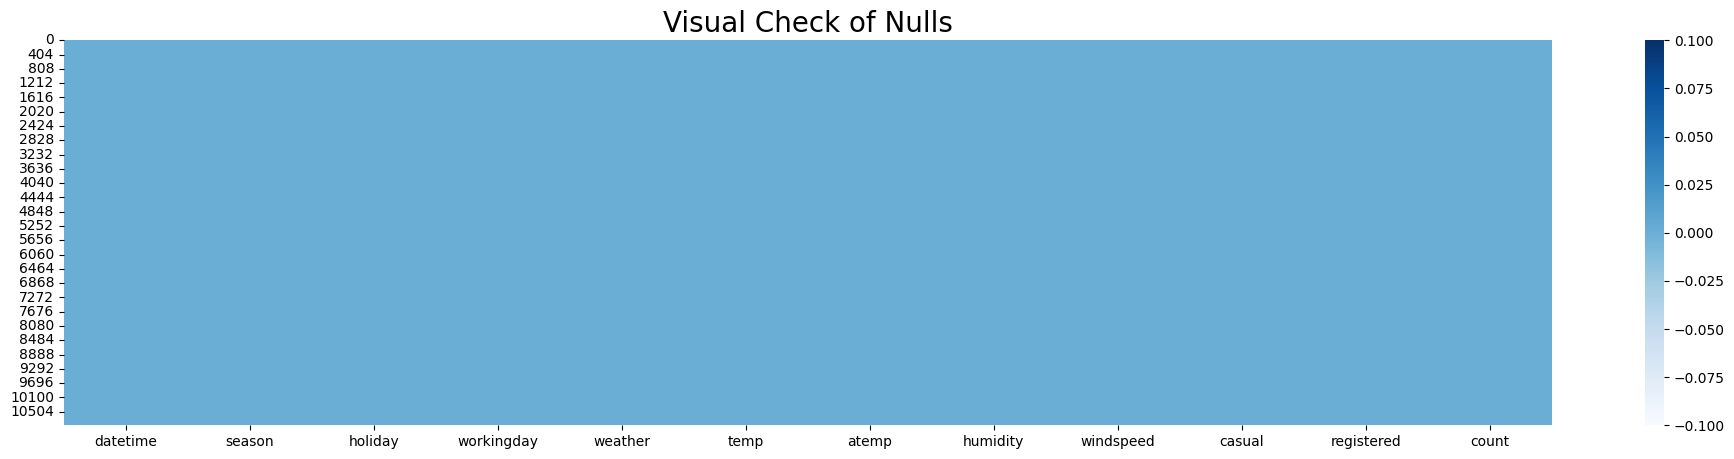

In [ ]:
plt.figure(figsize=(24,5))

sns.heatmap(df.isnull(),cmap='Blues')
plt.title('Visual Check of Nulls',fontsize=20)
plt.show()

In [ ]:
df.shape

(10886, 12)

In [ ]:
bold_txt = "\033[1m"
reset_txt = "\033[0m"

print(f"Dataset contains data from {bold_txt}{df['datetime'].min()}{reset_txt} to {bold_txt}{df['datetime'].max()}{reset_txt}")

Dataset contains data from 2011-01-01 00:00:00 to 2012-12-19 23:00:00


Assigning appropriate datatypes to columns

In [ ]:
df['datetime']= pd.to_datetime(df['datetime'])

In [ ]:
for col in list(df.columns)[1:5]:
  df[col] = df[col].astype('category')



Analysing timeseries column to get detailed information from data.

In [ ]:
df['datetime']= pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['month'] = df['month'].replace({
    1:"Jan",
    2:'Feb',
    3:"Mar",
    4:"Aprl",
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
})
df['day'] = df['datetime'].dt.strftime("%A")


In [ ]:
df['season']= df['season'].map(str)
season_mapping = {'1':'spring', '2':'summer', '3':'fall', '4':'winter'}
df["season"] = df["season"].map(lambda x: season_mapping[x])

df['holiday']= df['holiday'].map(str)
holiday_mapping = {'0':'no', '1':'yes'}
df['holiday'] = df['holiday'].map(lambda x: holiday_mapping[x])

df['workingday'] = df['workingday'].map(str)
workingday_mapping = {'0':'no','1':'yes'}
df['workingday'] = df['workingday'].map(lambda x: workingday_mapping[x])

df['weather']= df['weather'].map(str)
weather_mapping = {'1':'clear', '2':'partly_cloudy', '3':'rain', '4':'heavy rain'}
df['weather'] = df['weather'].map(lambda x: weather_mapping[x])

**Univariant Analysis**

1.Categorical Columns

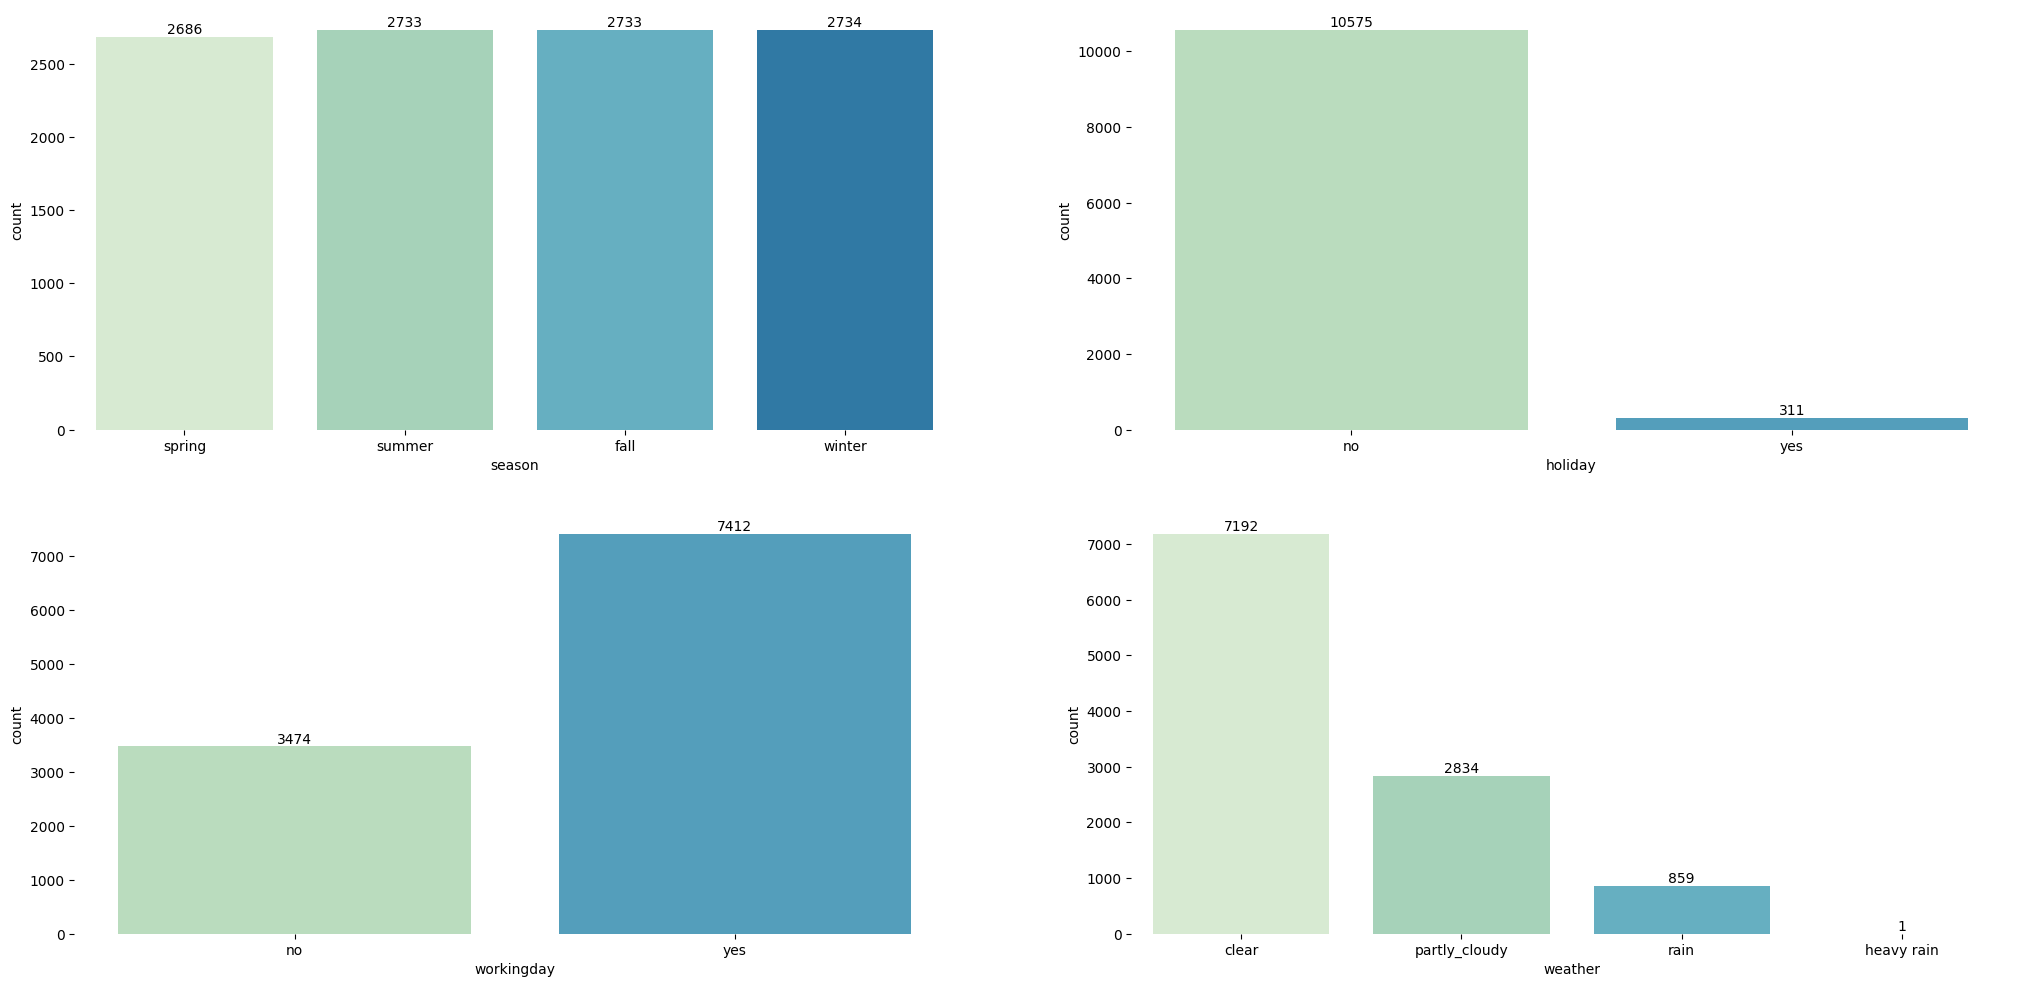

In [ ]:
plt.figure(figsize=(25,12))
n=1
for i in (df.columns):
  if df[i].dtype=='category':
    plt.subplot(2,2,n)
    a=sns.countplot(data= df,x=i,hue=i,palette='GnBu')

    for container in a.containers:
      a.bar_label(container,label_type='edge')

    sns.despine(left=True,bottom=True)

    n+=1


2. Numerical Columns

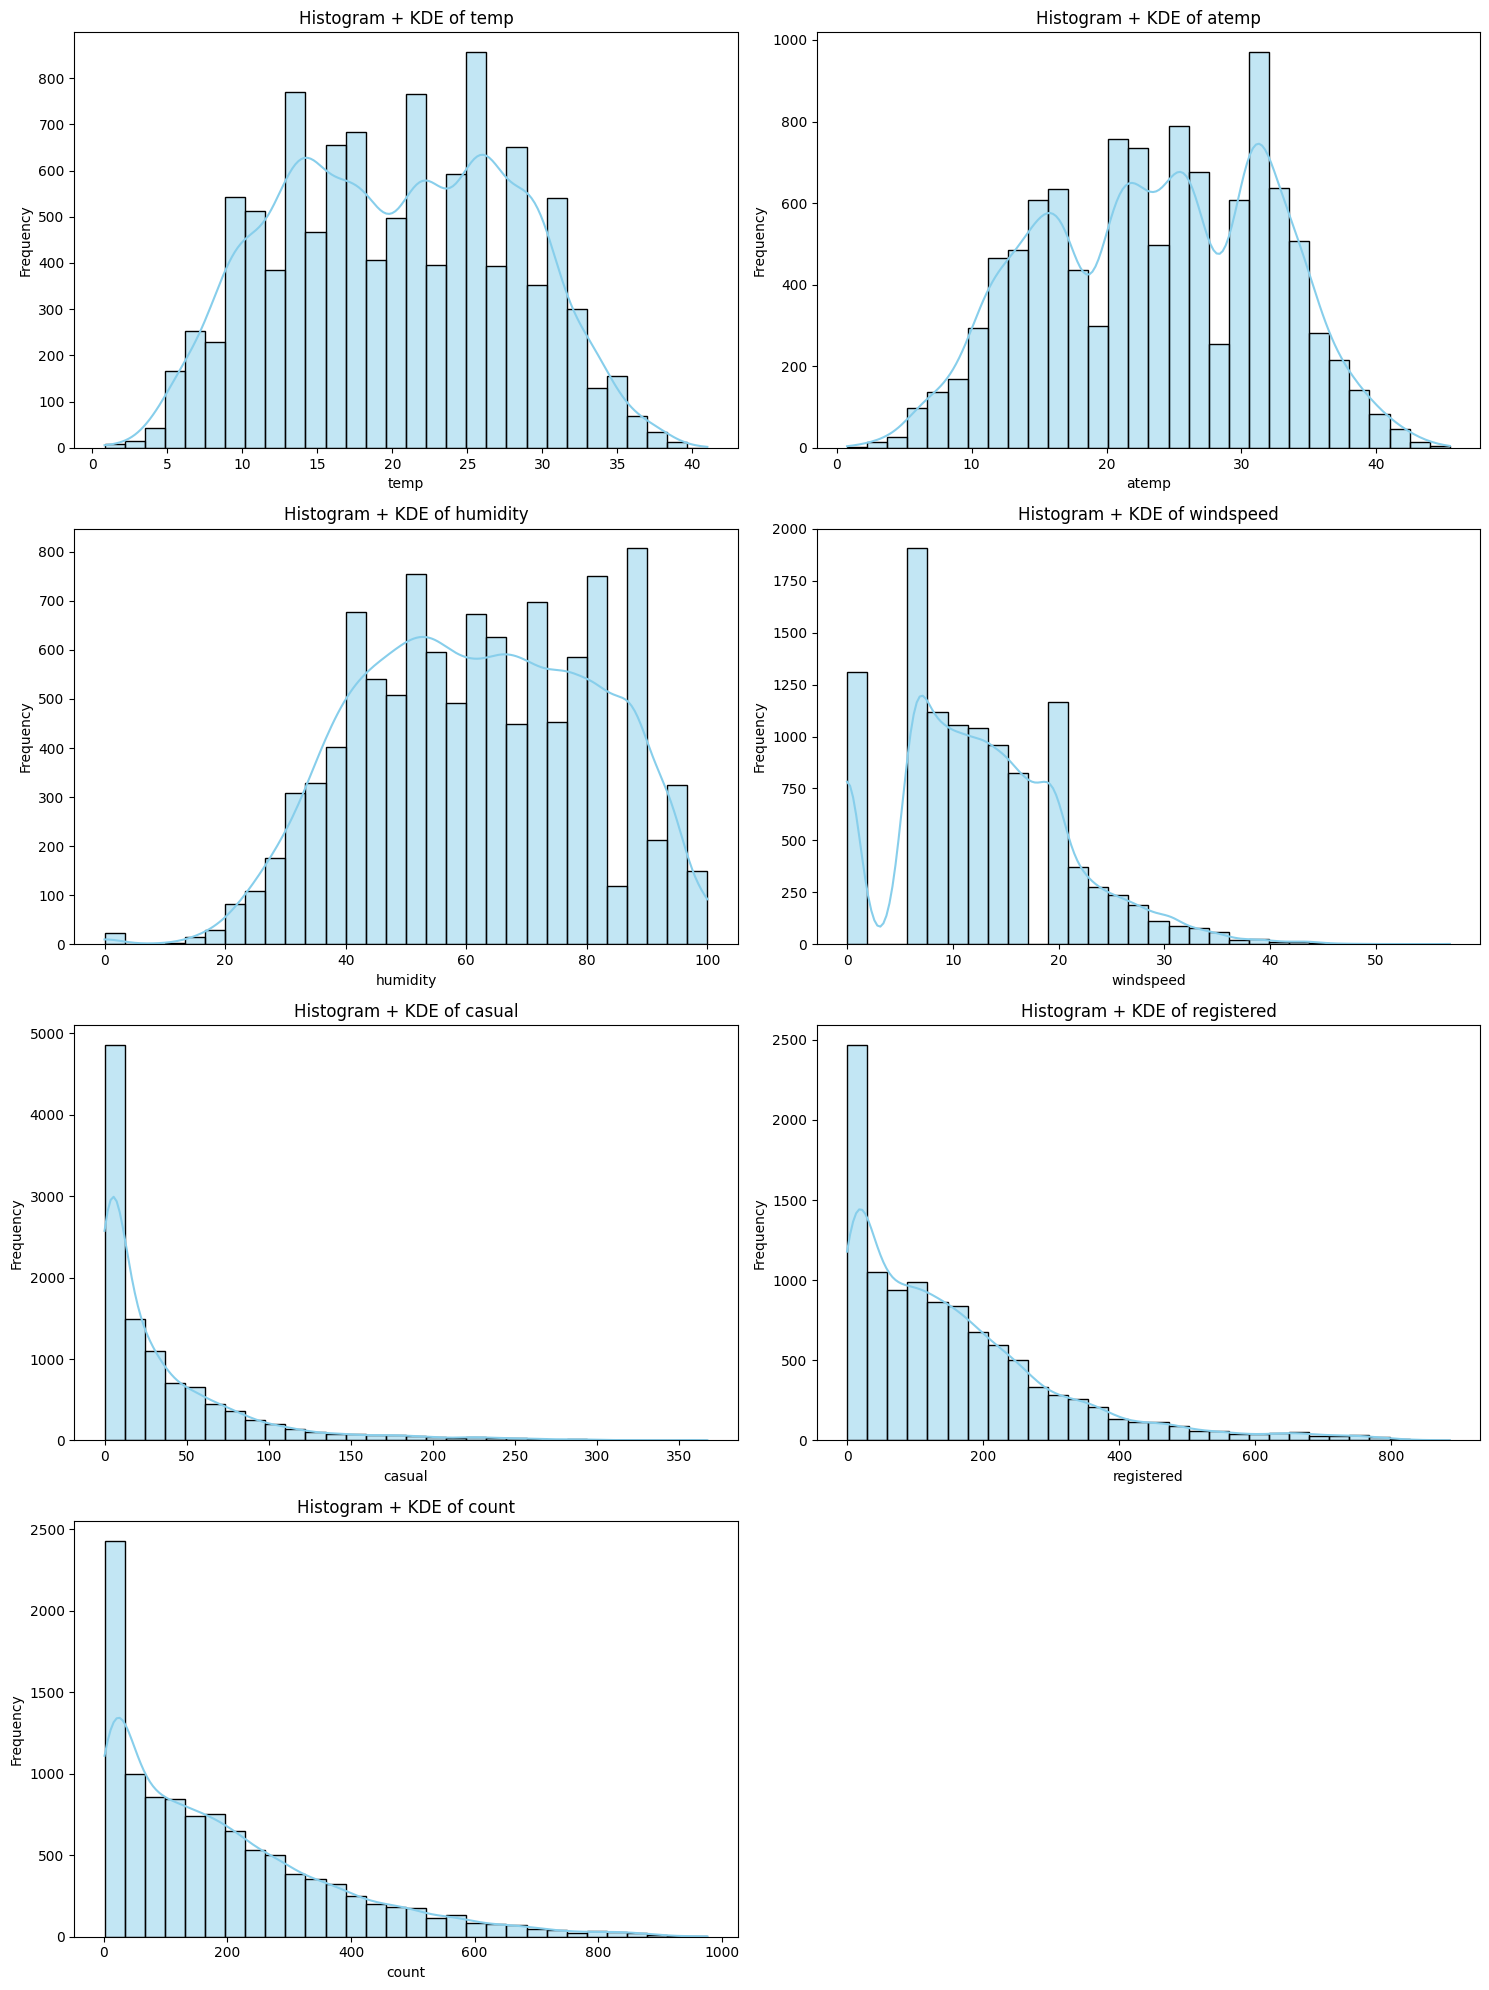

In [ ]:
import math
num_col=[]
for col in list(df.columns):
  if df[col].dtype == 'int64' or df[col].dtype =='float64':
    num_col.append(col)
n=len(num_col)

cols = 2 if n > 1 else 1
rows = math.ceil(n / cols)


fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten() if n > 1 else [axes]

for i, col in enumerate(num_col):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram + KDE of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



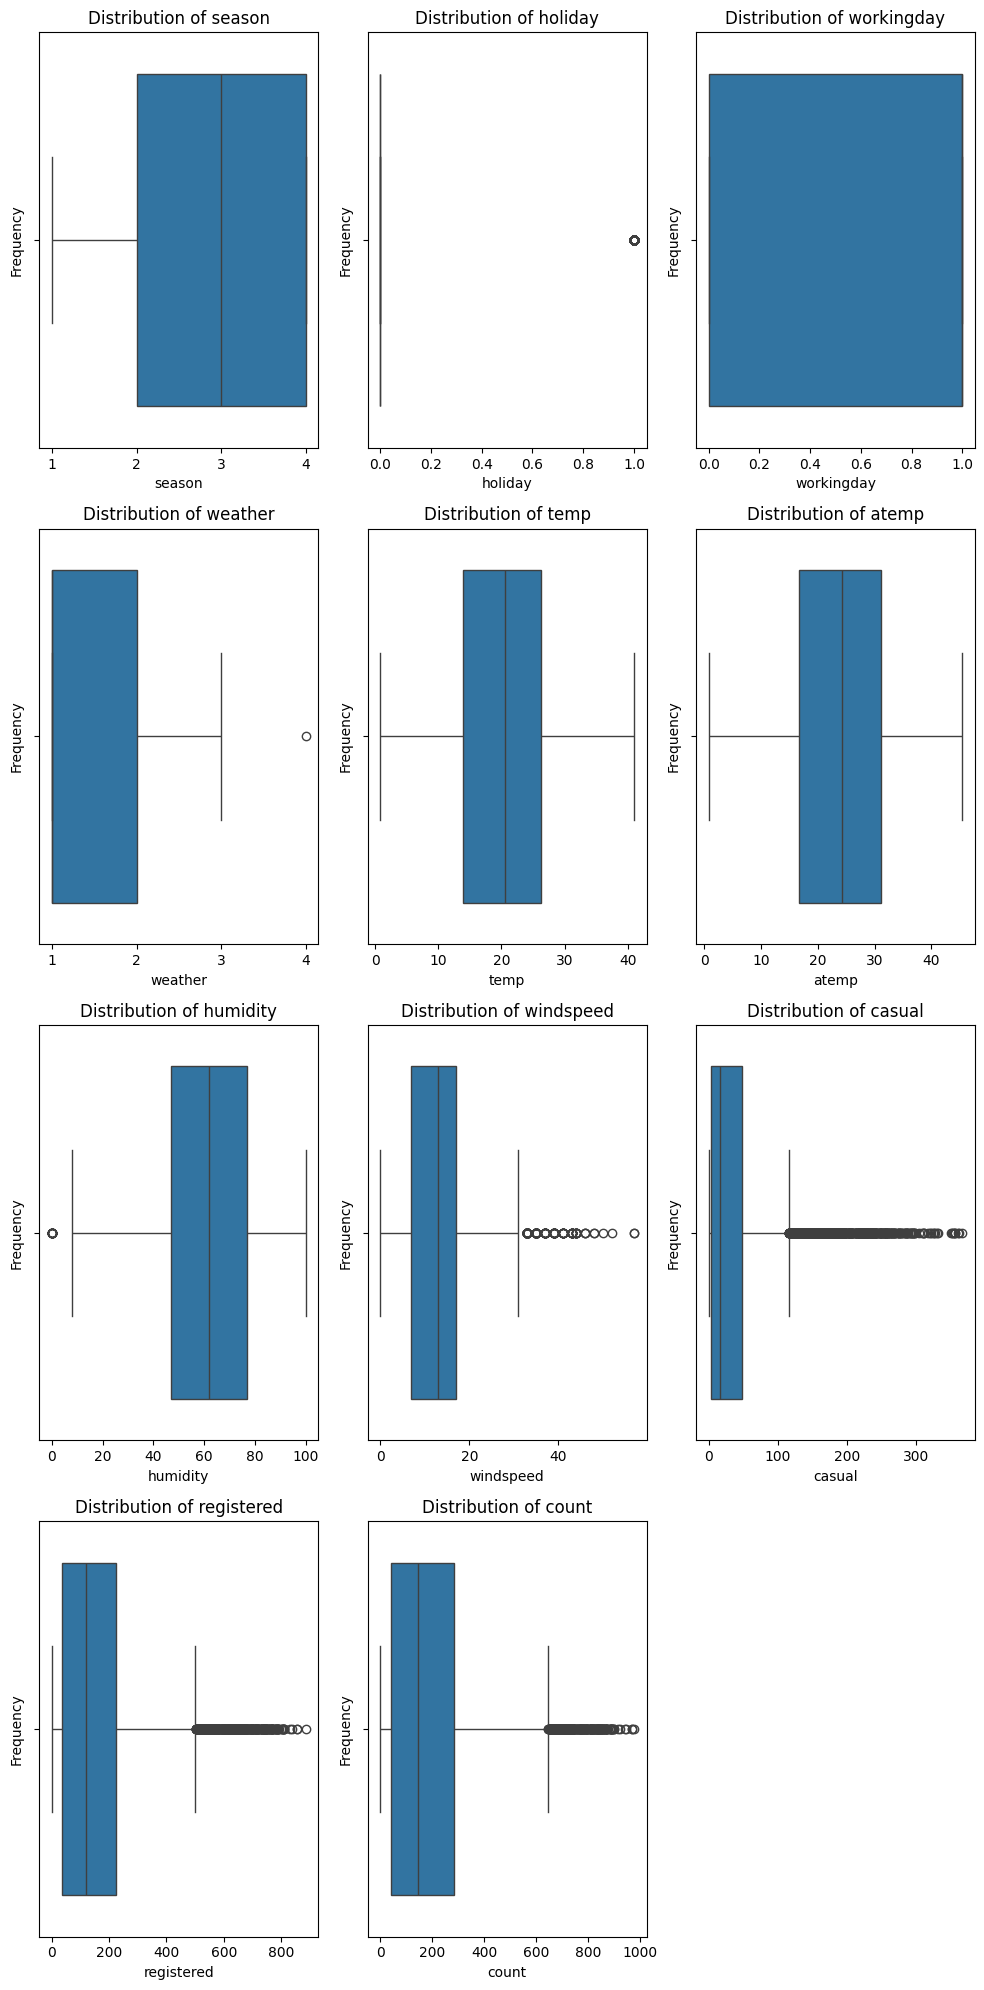

In [ ]:
num_col=[]
for col in list(df.columns):
  if df[col].dtype == 'int64' or df[col].dtype =='float64':
    num_col.append(col)
n=len(num_col)

cols = 3 if n > 2 else 1
rows = math.ceil(n / cols)


fig, axes = plt.subplots(rows, cols, figsize=(10,5 * rows))
axes = axes.flatten() if n > 1 else [axes]

for i, col in enumerate(num_col):
    sns.boxplot(x=df[col],data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Observation:<br>


*   Temp and atemp both exhibit a symmetrical distribution with no major outliers, indicating stable temperature ranges.
*   Humidity :Mostly centered betweem 40-80%, with a low-humidity outliers, suggesting rare dry conditions.

*   Casual & registered users both show a high number of outliers, indicating fluctuating demand, with casual users having more extreme variations








**Bivarinat Analysis**

1.Count Vs All Categorical Columns

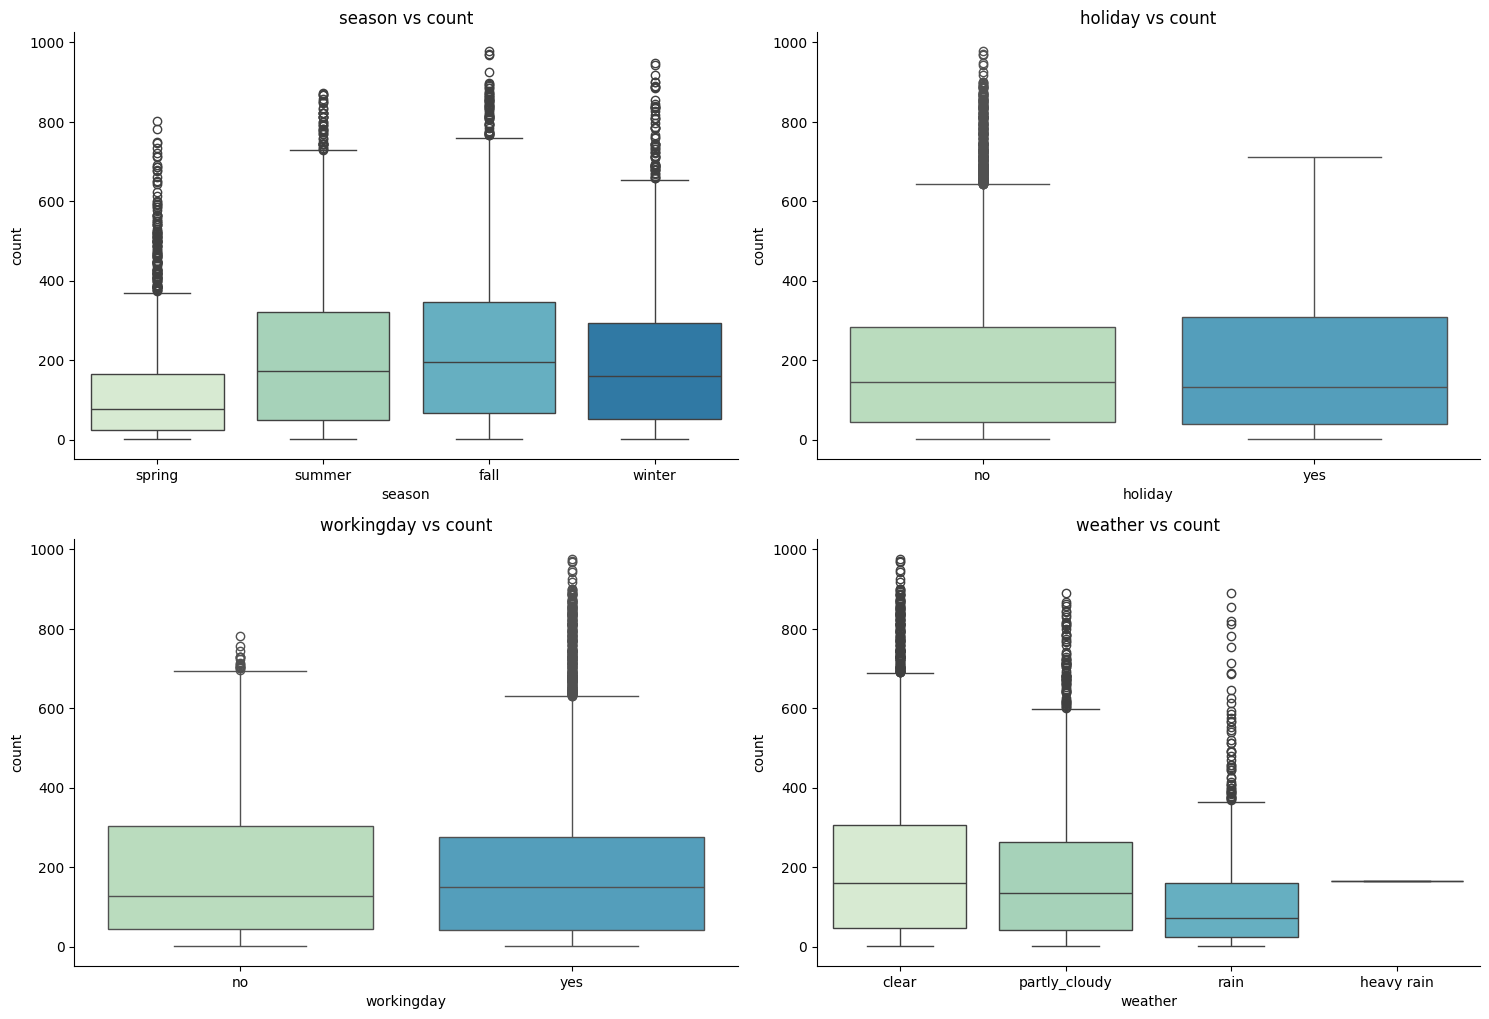

In [ ]:
cat_col= []
for col in list(df.columns):
  if df[col].dtype=='category':
    cat_col.append(col)
m= len(cat_col)

col = 2 if n>1 else[n]
rows = math.ceil(n/col)
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten() if n > 1 else [axes]


for i, col in enumerate(cat_col):
    sns.boxplot(x= df[col],y= df['count'],hue = df[col],palette='GnBu',ax=axes[i])
    axes[i].set_title(f'{col} vs count')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('count')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

sns.despine()
plt.tight_layout()
plt.show()



 <h2>
 Observation:<br>

*   In summer and fall seasons more bikes are rented as compared to other seasons
*  Whenever there is rain, thunderstorm, snow or fog, there were less bikes rented.
*   Working day has more median number of rentals, where has holidays have similar median number of rentals seen.

</h2>





2. Count of rides over the span of hours,days,months and years


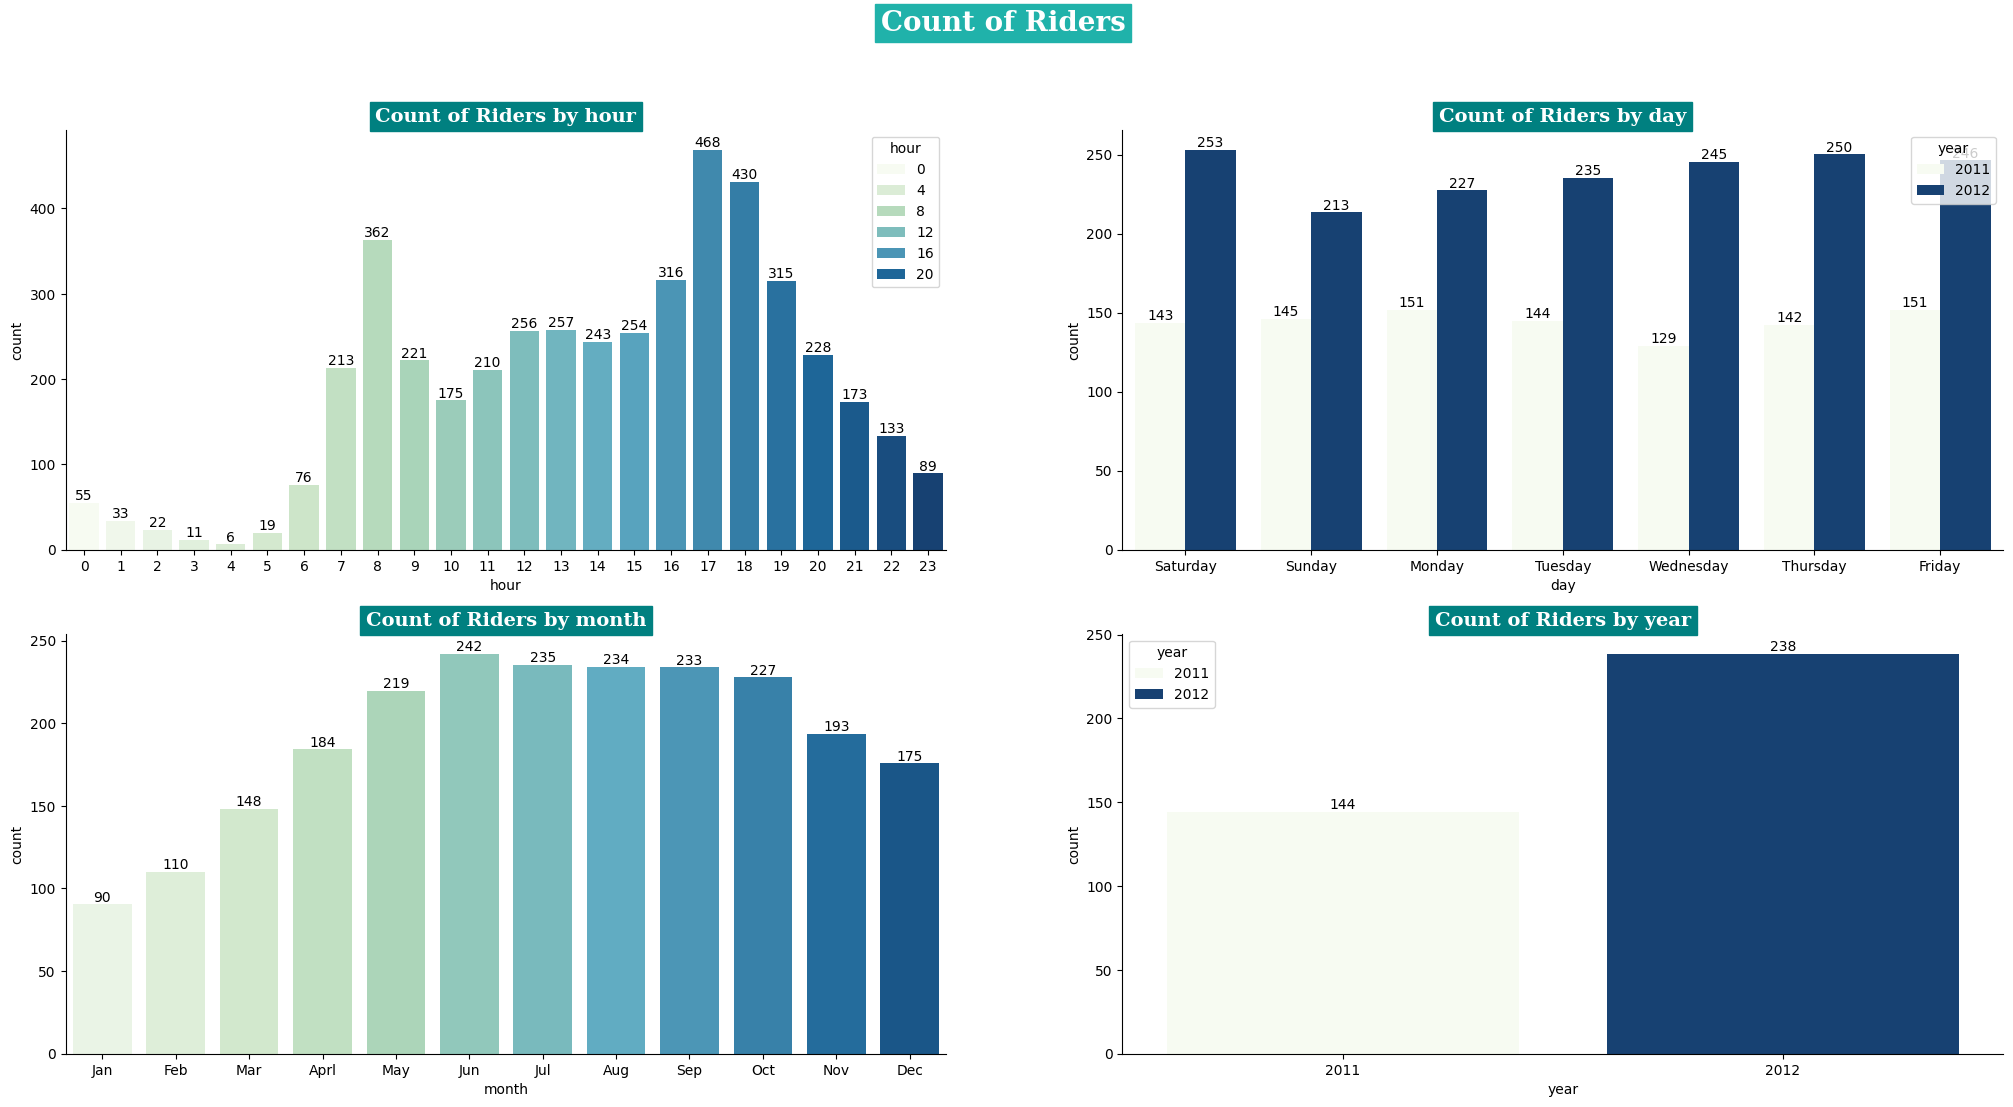

In [ ]:
plt.figure(figsize=(25,12))
plt.suptitle('Count of Riders',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='lightseagreen',color='w')
plt.style.use('default')

plt.subplot(2,2,1)
b=sns.barplot(x='hour',y='count',data=df,palette='GnBu',errorbar=None,hue='hour')
for container in b.containers:
  b.bar_label(container,fmt='%d')
plt.title('Count of Riders by hour',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='teal',color='w')

plt.subplot(223)
b=sns.barplot(x='month',y='count',data=df,errorbar=None,palette='GnBu',hue='month')
for container in b.containers:
  b.bar_label(container,fmt='%d')

plt.title('Count of Riders by month',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='teal',color='w')

plt.subplot(224)
b=sns.barplot(x='year',y='count',data=df,errorbar=None,palette='GnBu',hue='year')
for container in b.containers:
  b.bar_label(container,fmt='%d')
plt.title('Count of Riders by year',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='teal',color='w')

plt.subplot(222)
b=sns.barplot(x='day',y='count',data=df,errorbar=None,palette='GnBu',hue='year')
for container in b.containers:
  b.bar_label(container,fmt='%d')
plt.title('Count of Riders by day',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='teal',color='w')

sns.despine()
plt.show()

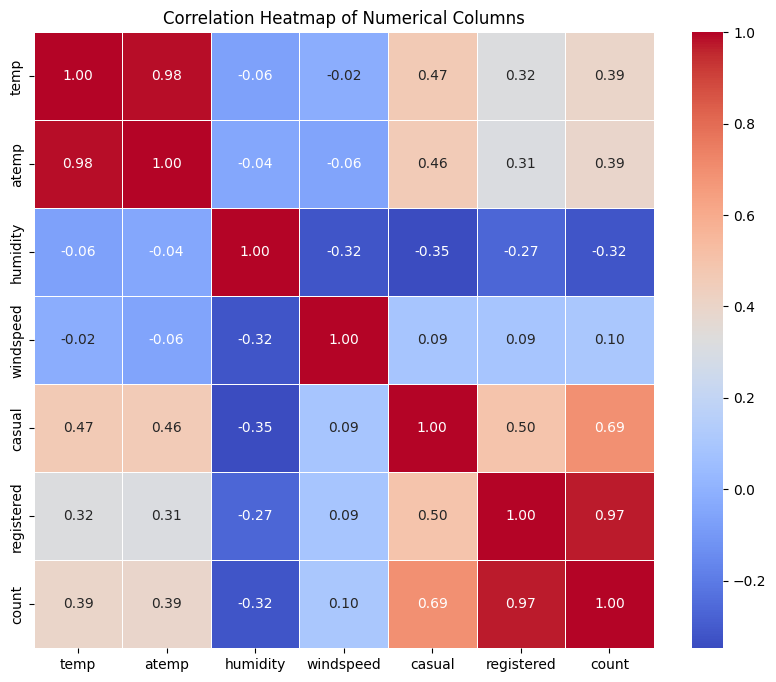

In [ ]:
corr_matrix = df[num_col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

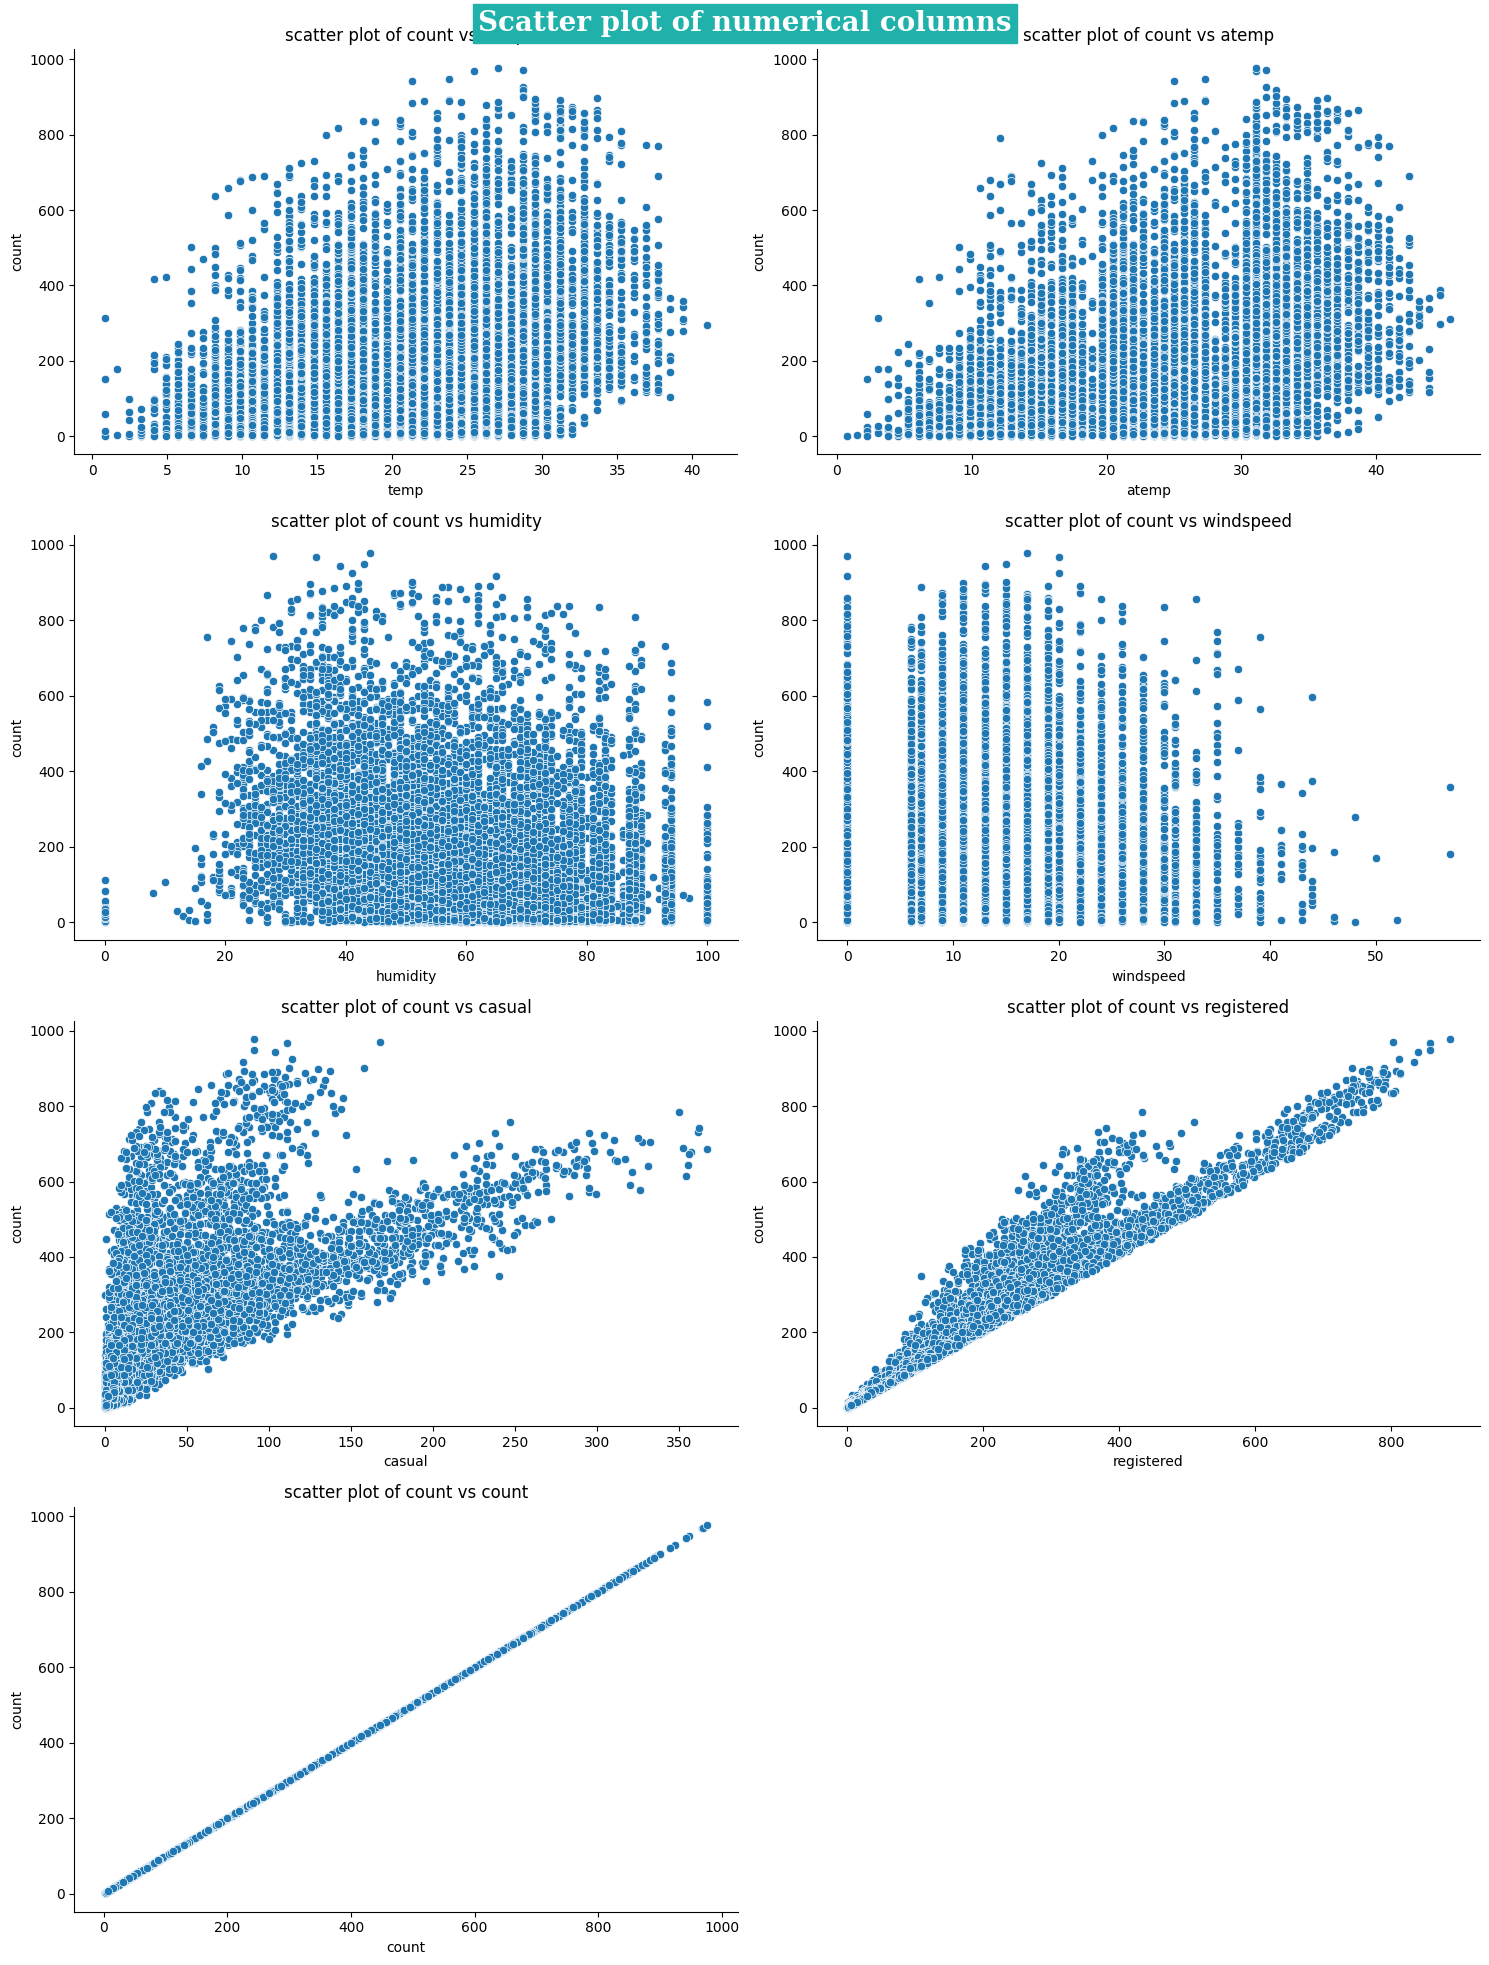

In [ ]:
n= len(num_col)
col = 2 if n>1 else 1
row = math.ceil(n/col)
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
plt.suptitle('Scatter plot of numerical columns',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='lightseagreen',color='w')
axes = axes.flatten() if n > 1 else [axes]
for i, col in enumerate(num_col):
    sns.scatterplot(x=df[col],y=df['count'], ax=axes[i])
    axes[i].set_title(f'scatter plot of count vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('count')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'hour', 'day'],
      dtype='object')

Time Series Analysis

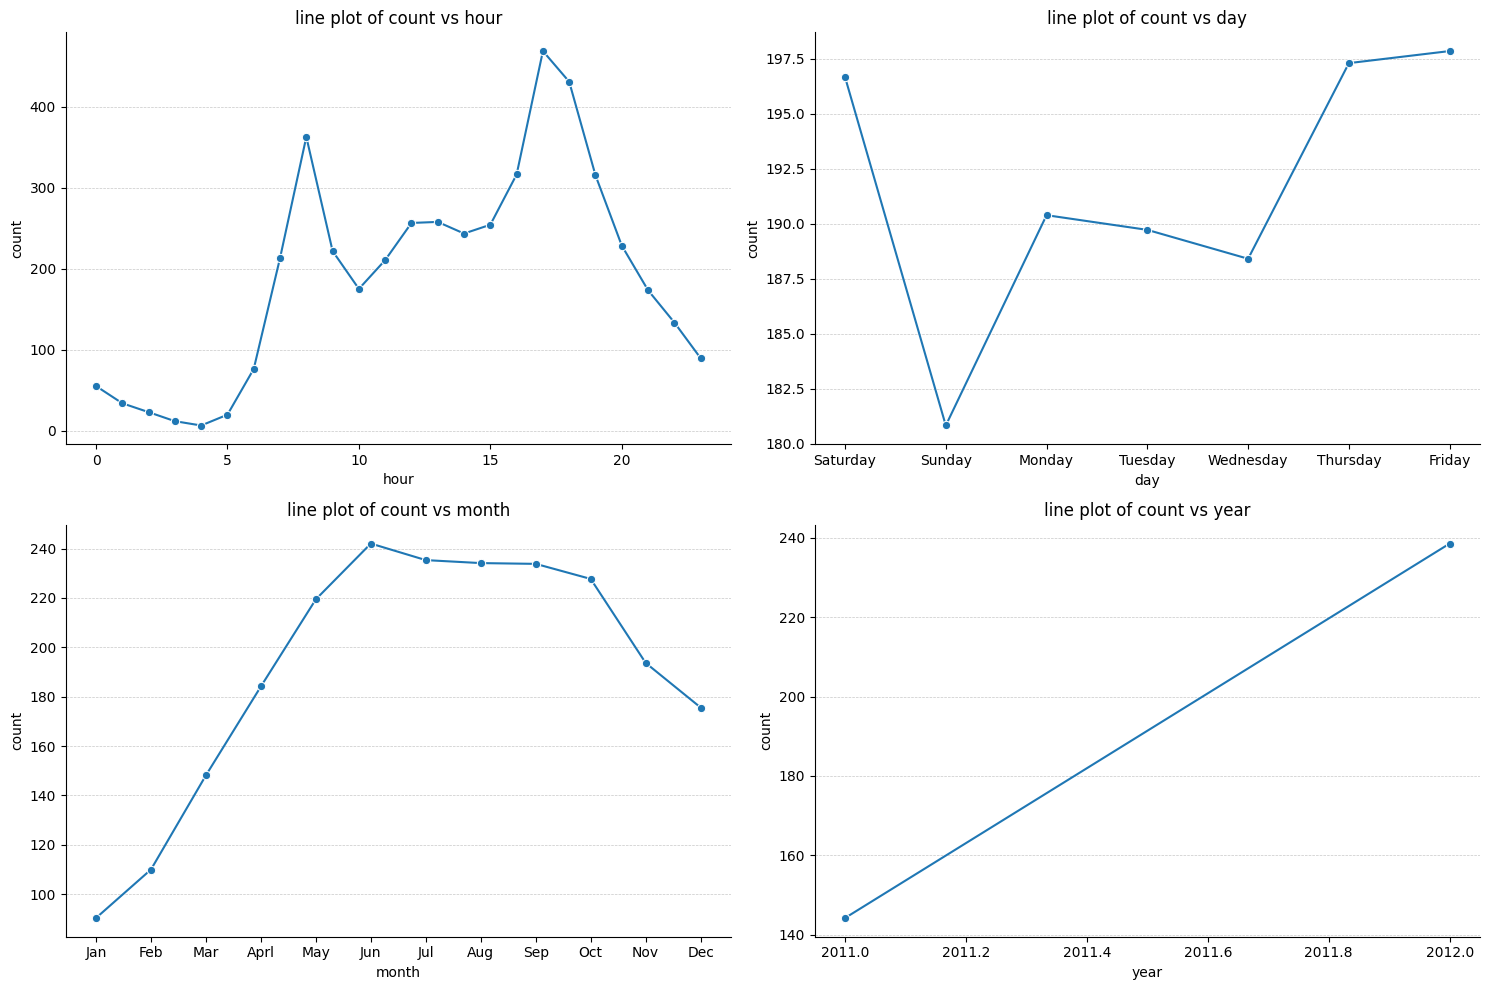

In [ ]:
time_col = ['hour','day','month','year']
n = len(time_col)
col = 2 if n>1 else 1
row = math.ceil(n/col)
fig,axes = plt.subplots(row,col, figsize= (15,5*row))
axes = axes.flatten() if n > 1 else [axes]
for i,col in enumerate(time_col):
    sns.lineplot(x=df[col], y=df['count'], ax= axes[i],errorbar=None, marker='o')
    axes[i].set_title(f'line plot of count vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('count')
    axes[i].grid(axis='y',linestyle='--',linewidth=0.5,alpha=0.7)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

sns.despine()
plt.tight_layout()
plt.show()

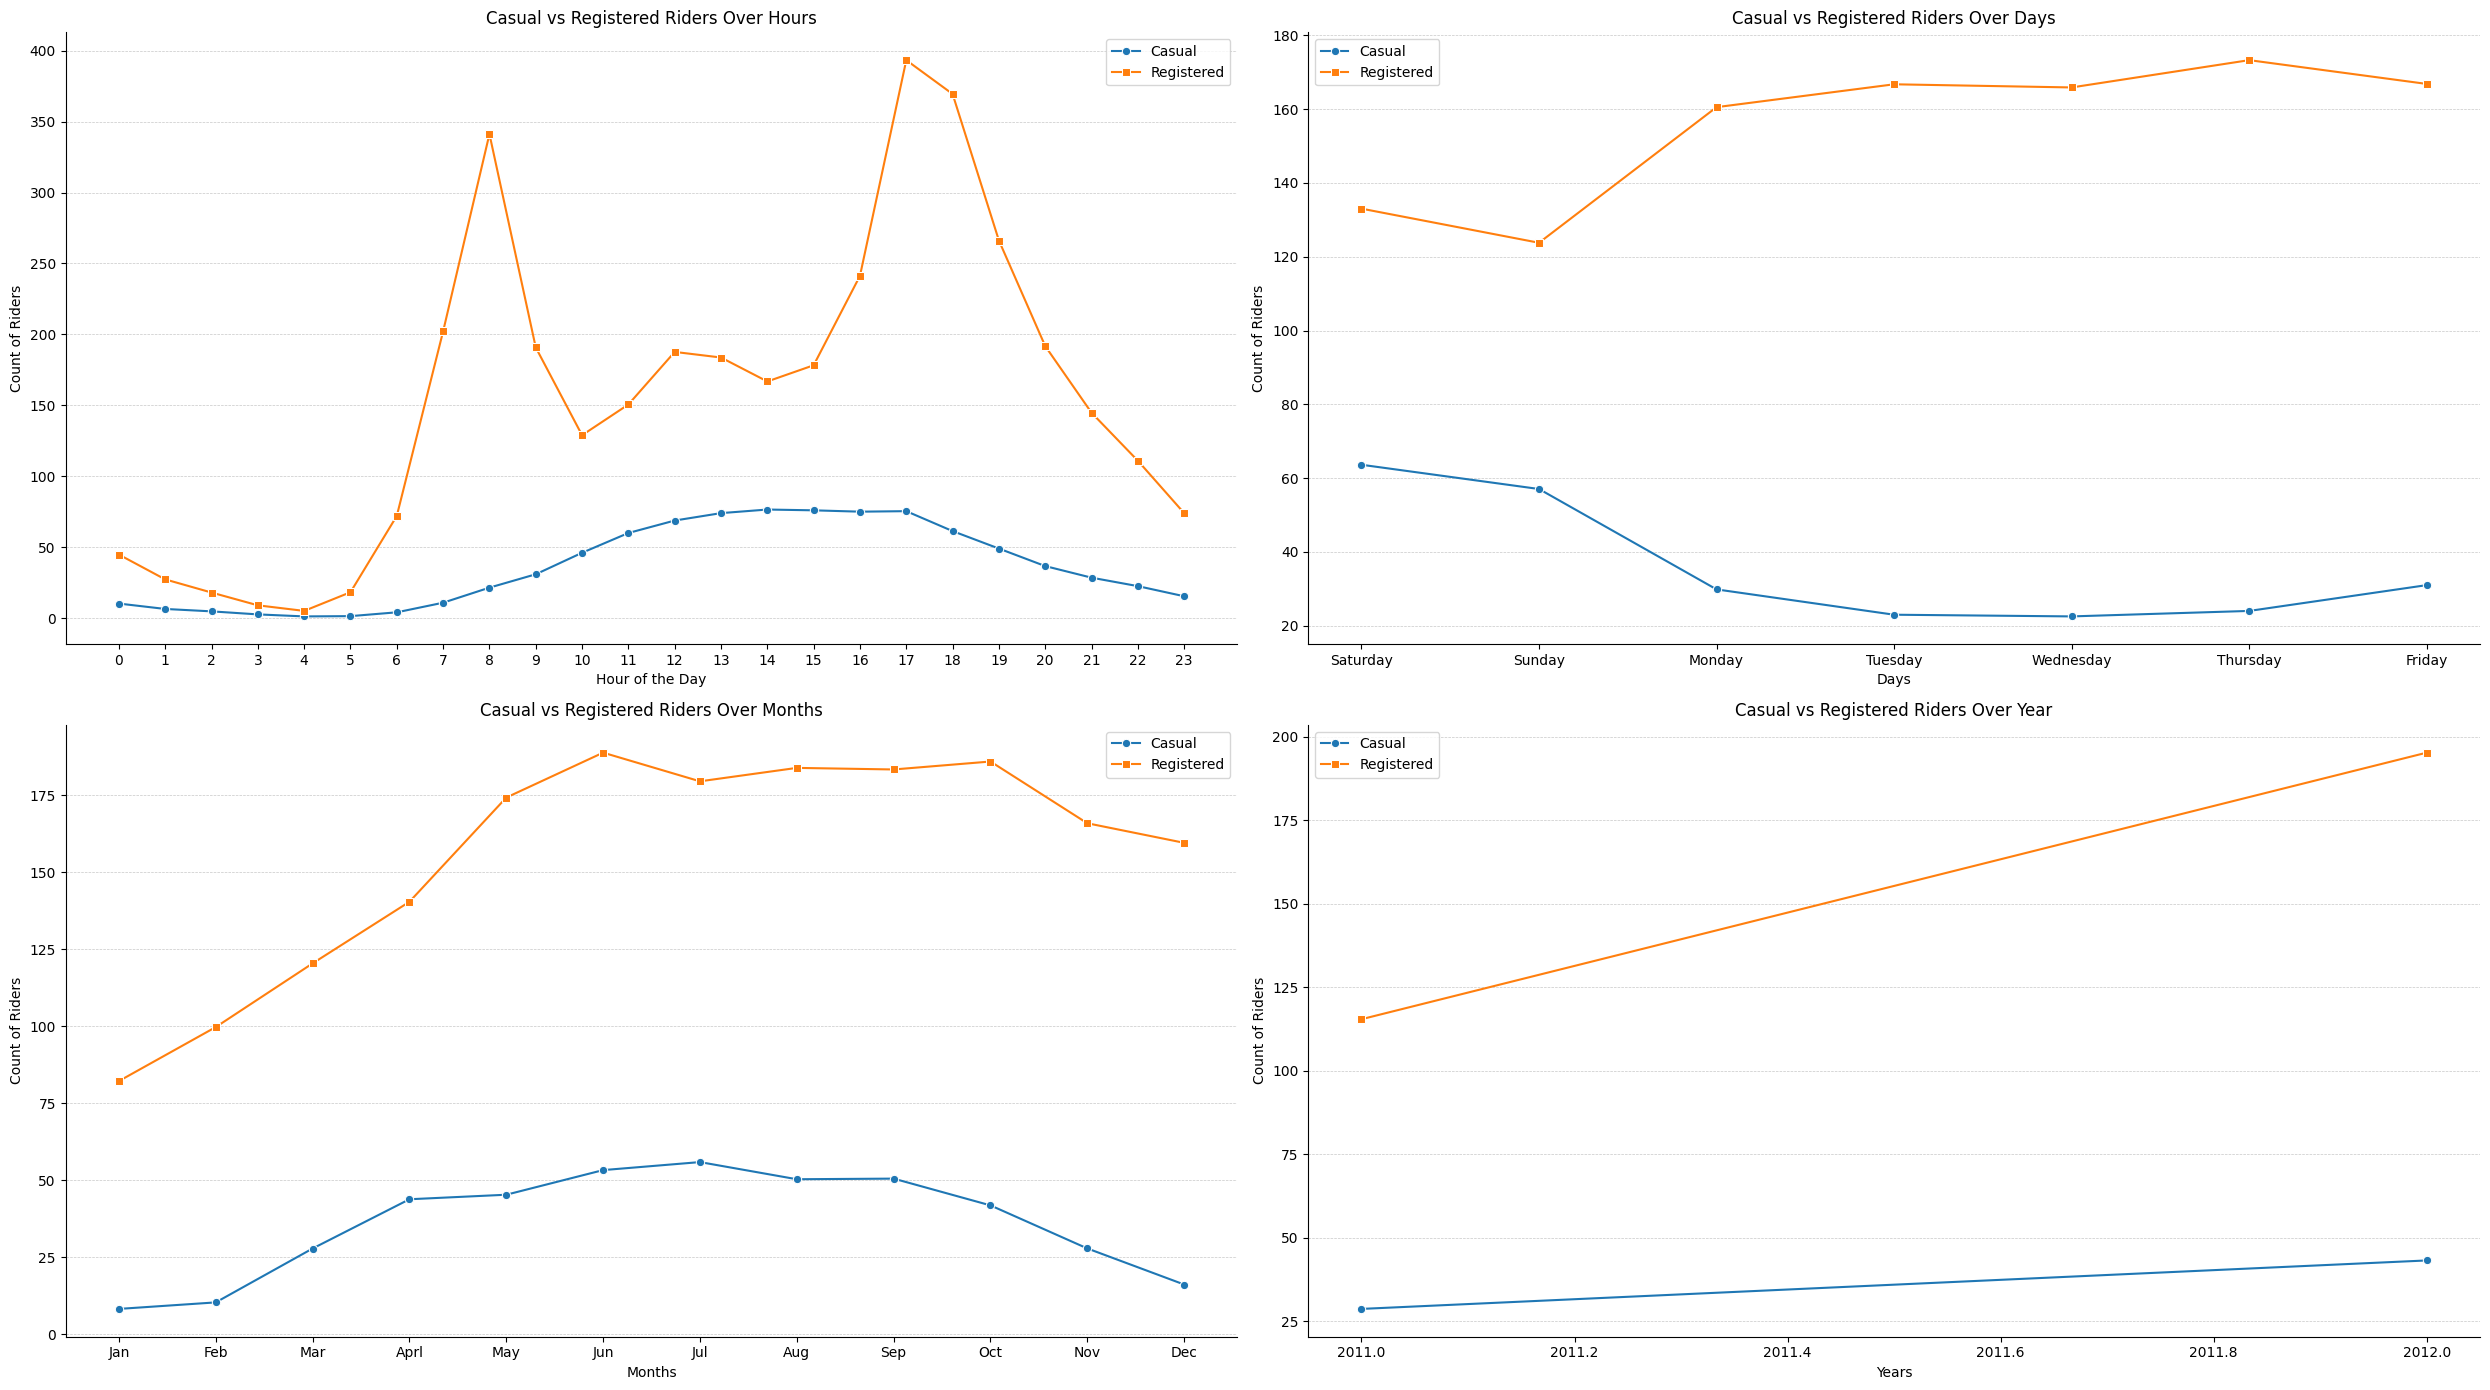

In [ ]:
plt.figure(figsize=(25,14))

plt.subplot(221)
sns.lineplot(x=df['hour'], y=df['casual'], label='Casual', errorbar=None, marker='o')
sns.lineplot(x=df['hour'], y=df['registered'], label='Registered', errorbar=None, marker='s')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Riders')
plt.title('Casual vs Registered Riders Over Hours')
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(np.arange(0, 24, 1))  # if hour ranges from 0 to 24

plt.subplot(222)
sns.lineplot(x=df['day'], y=df['casual'], label='Casual', errorbar=None, marker='o')
sns.lineplot(x=df['day'], y=df['registered'], label='Registered', errorbar=None, marker='s')
plt.xlabel('Days')
plt.ylabel('Count of Riders')
plt.title('Casual vs Registered Riders Over Days')
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.subplot(223)
sns.lineplot(x=df['month'], y=df['casual'], label='Casual', errorbar=None, marker='o')
sns.lineplot(x=df['month'], y=df['registered'], label='Registered', errorbar=None, marker='s')
plt.xlabel('Months')
plt.ylabel('Count of Riders')
plt.title('Casual vs Registered Riders Over Months')
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.subplot(224)
sns.lineplot(x=df['year'], y=df['casual'], label='Casual', errorbar=None, marker='o')
sns.lineplot(x=df['year'], y=df['registered'], label='Registered', errorbar=None, marker='s')
plt.xlabel('Years')
plt.ylabel('Count of Riders')
plt.title('Casual vs Registered Riders Over Year')
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
sns.despine()
plt.show()


**Statistical Inference / Hypothesis Testing Problem Statements**


<span style="font-size:8px">(Alpha for all the problem statement is taken as 5% or 0.05)</span>


Checking for Normality of Data

**Q.Is there a significant difference in average rides between seasons**

In [ ]:
seasons = list(df['season'].value_counts().reset_index()['season'])

In [ ]:
season_colors = {
    'spring': 'skyblue',
    'summer': 'orange',
    'fall': 'green',
    'winter': 'purple'
}


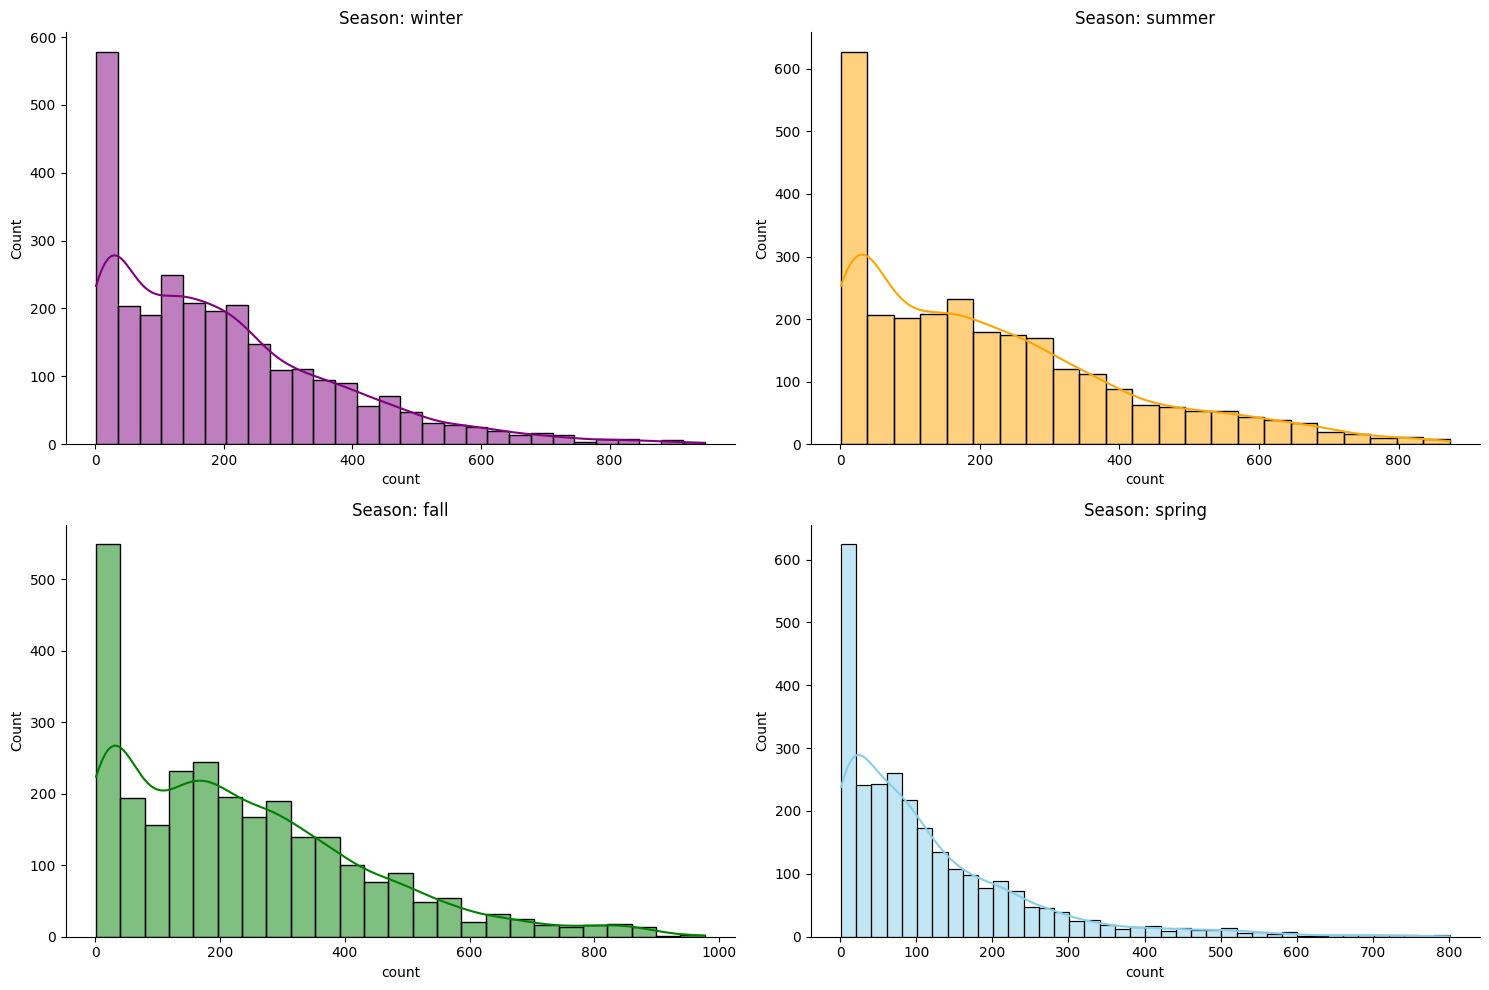

In [ ]:
n= len(df['season'].value_counts())
col = 2 if n>2 else 1
row = math.ceil(n/col)

fig,axes = plt.subplots(row,col, figsize=(15,5*row))
axes = axes.flatten() if n > 1 else [axes]

for i,season in enumerate(seasons):
  subset = df[df['season']==season]
  sns.histplot(data= subset,x='count',kde=True,ax= axes[i],color=season_colors.get(season,'grey'),legend= False)
  axes[i].set_title(f'Season: {season}')

# Turn off any unused subplots (if total plots < rows*cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

 Shapiro-Wilk’s test -

We will test the null hypothesis

>$H_0:$ Count follows normal distribution

against the alternative hypothesis

>$H_a:$ Count doesn't follow normal distribution

In [ ]:
#Shapiro-Wilk test
sample = df[df['season'] == season]['count'].sample(n=1000, random_state=42)
stat, p = shapiro(sample)
print(f"Shapiro-Wilk Test: W={stat:.3f}, p={p:.3f}")


Shapiro-Wilk Test: W=0.819, p=0.000


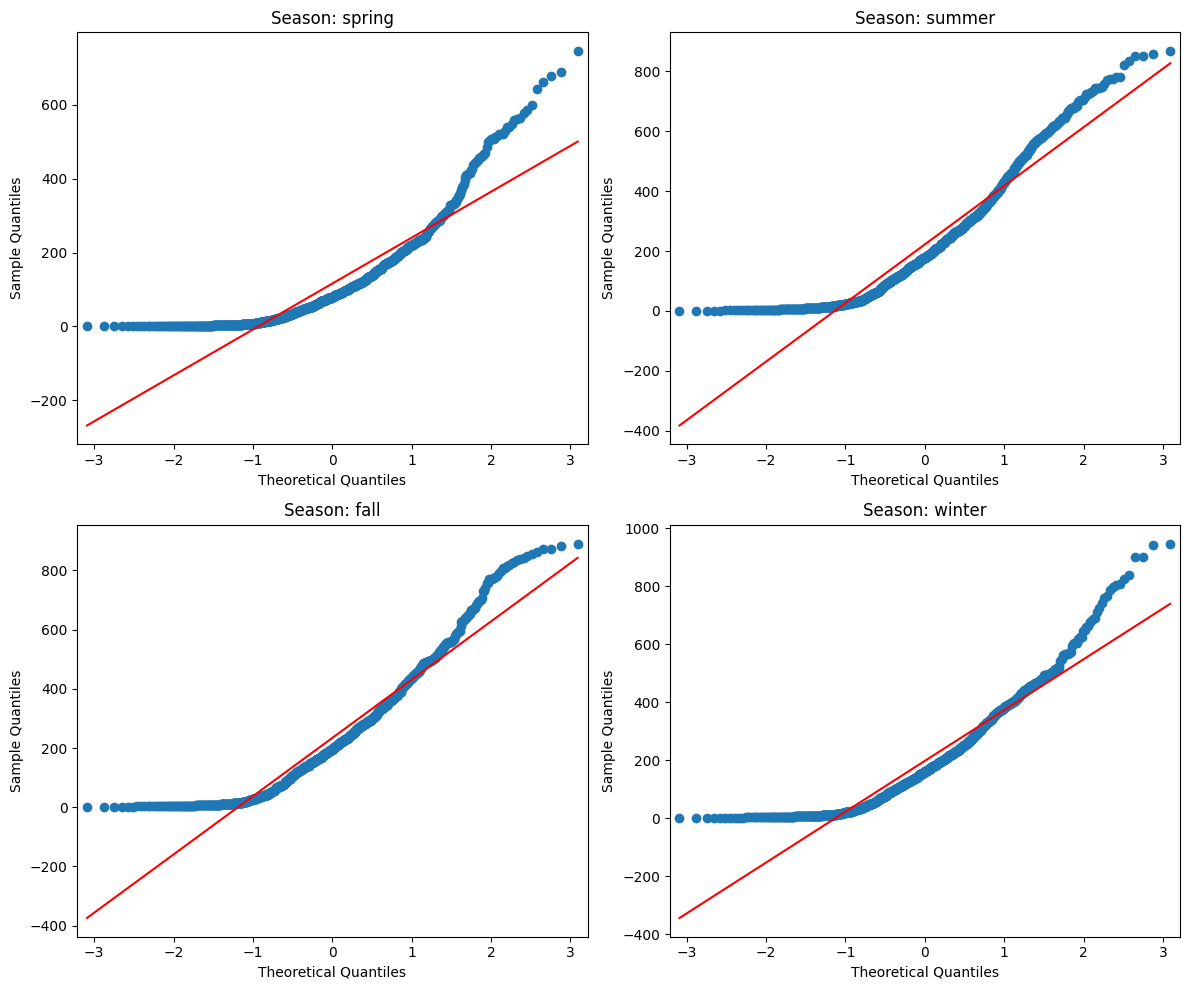

In [ ]:
seasons = df['season'].unique()
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, season in enumerate(seasons):
    sample = df[df['season'] == season]['count'].sample(n=1000, random_state=42)
    qqplot(sample, line='s', ax=axes[i])
    axes[i].set_title(f"Season: {season}")

plt.tight_layout()
plt.show()


Observation-<br>
We can clearly see from our visual plots that count of bikes does not follow normal distribution and the hypothesis tests like One-way Annova that assumes normality of data cannot be directly applied in this situation.

Log Transformation

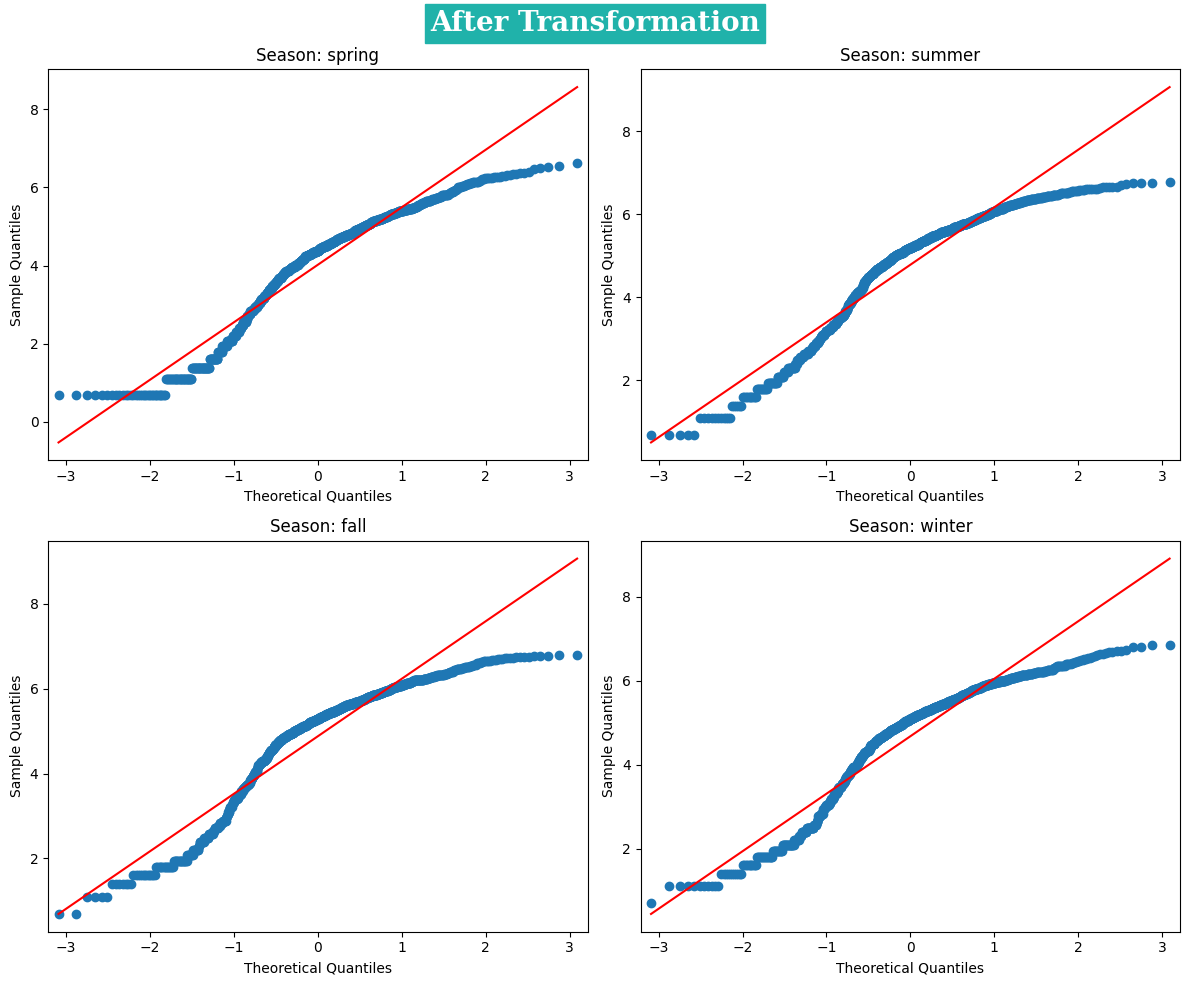

In [ ]:
#log transformation

df['log_count'] = np.log(df['count'] + 1)

seasons = df['season'].unique()
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.suptitle('After Transformation',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='lightseagreen',color='w')
axes = axes.flatten()

for i, season in enumerate(seasons):
    sample = df[df['season'] == season]['log_count'].sample(n=1000, random_state=42)
    qqplot(sample, line='s', ax=axes[i])
    axes[i].set_title(f"Season: {season}")

plt.tight_layout()
plt.show()

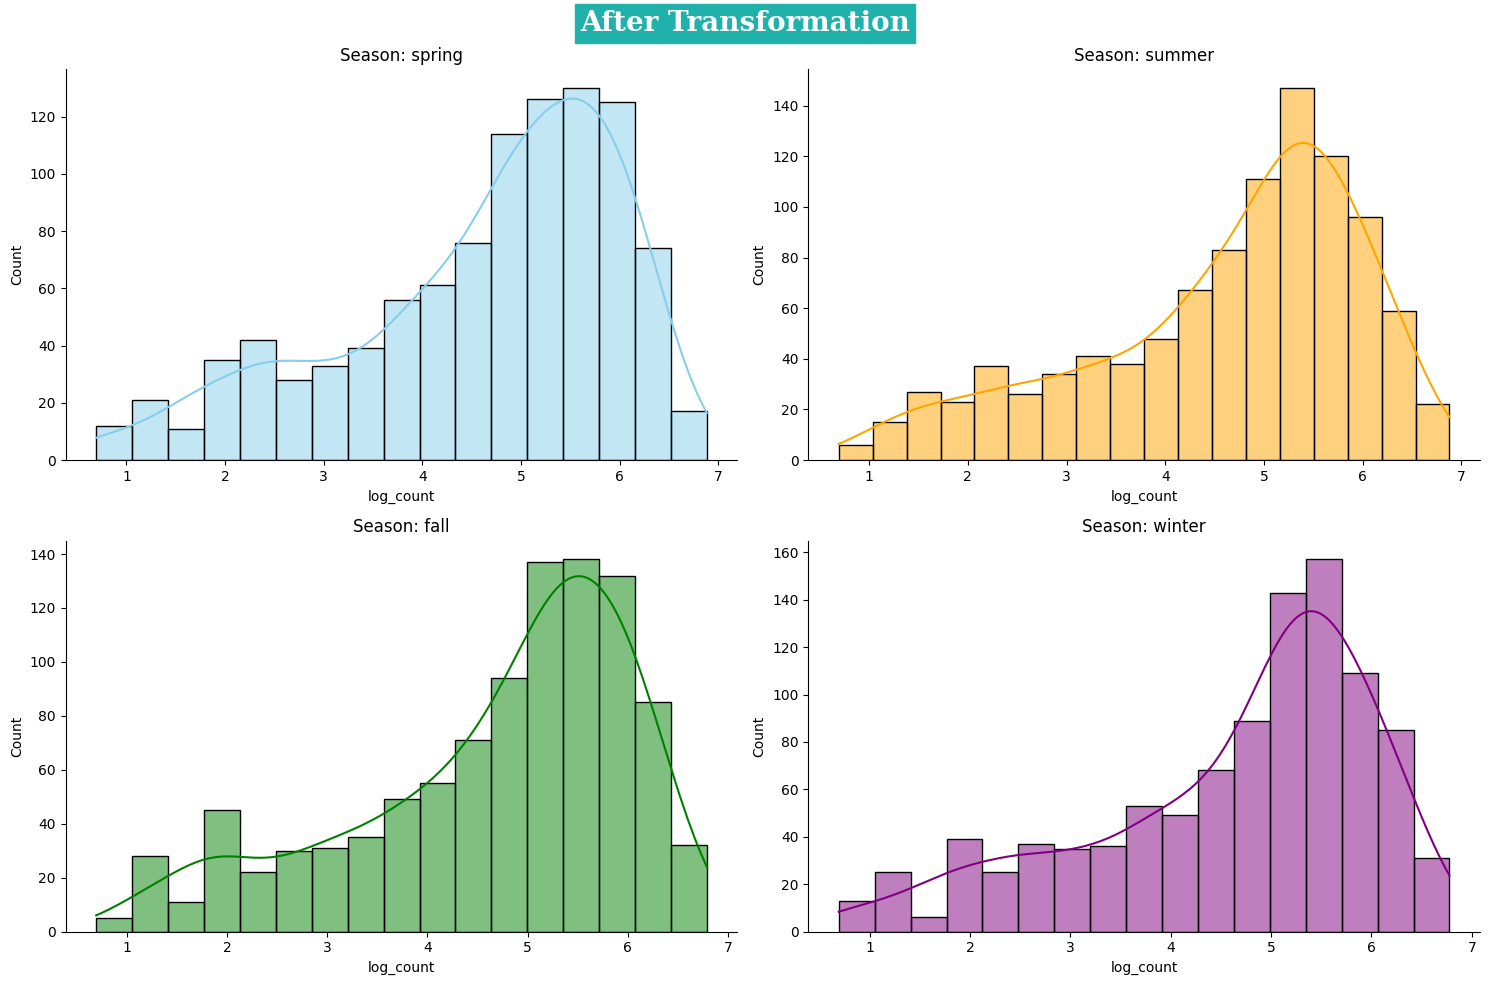

In [ ]:
n= len(df['season'].value_counts())
col = 2 if n>2 else 1
row = math.ceil(n/col)

fig,axes = plt.subplots(row,col, figsize=(15,5*row))
plt.suptitle('After Transformation',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='lightseagreen',color='w')
axes = axes.flatten() if n > 1 else [axes]

for i,season in enumerate(seasons):
  subset = df[df['season']==season]
  count_sample= df['log_count'].sample(1000)
  sns.histplot(data= subset,x=count_sample,kde=True,ax= axes[i],color=season_colors.get(season,'grey'),legend= False)
  axes[i].set_title(f'Season: {season}')

# Turn off any unused subplots (if total plots < rows*cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

sns.despine()
plt.tight_layout()
plt.show()


**How central limit test apply to one way Annova**
<span style="font-size:6px">
1. CLT in Simple Terms:<br>

->The CLT states that as your sample size increases (typically >30), the sampling distribution of the sample mean will approximate a normal distribution, even if the original data is not normal. <br>

->In practical terms, this means that when you have sufficiently large samples (like your 10,886 rows), the sampling distributions of the means for each group (in this case, the different seasons) will likely follow a normal distribution.<br>

2. How It Relates to One-Way ANOVA:<br>

->One-way ANOVA assumes that the data from each group (season in your case) is normally distributed and has equal variances. While this assumption is important, the CLT allows for relaxation of strict normality in larger sample sizes. So, even if the data within each season isn’t perfectly normal, the mean of the sample distribution should be approximately normal as long as your sample size is sufficiently large (which you have, with 10,886 rows).<br>

->This means that with large enough samples, ANOVA is still appropriate even if the data itself is not perfectly normal.<br>
</span>

**Checking Normality after log transformation**

In [ ]:
sample = df[df['season'] == season]['log_count']
stat, p = shapiro(sample)
print(f"Shapiro-Wilk Test: W={stat:.3f}, p={p:.3f}")

Shapiro-Wilk Test: W=0.911, p=0.000


Check for Equal Variance(Levene Test)

We will test the null hypothesis

>$H_0$: All the seasons count variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
winter = df[df['season'] == 'winter']['log_count']
spring = df[df['season'] == 'spring']['log_count']
fall = df[df['season'] == 'fall']['log_count']
summer = df[df['season'] == 'summer']['log_count']

In [ ]:
stat, p_value = levene(winter,spring,fall,summer)
print('The p-value is : ', p_value)

The p-value is :  0.00024256106333780234


P-value less than alpha we can state that statistically one of the seasons variance is different.

Since both the tests fails i.e Shapiro-Wilks and Levene that tests normality and equal variance that is one of the assumptions of One-Way Annova, we should use Kruskal Wallis Test for better reliability .<br>
$H_0 :$ The distributions of the bike counts are the same across all seasons.<br>
$H_a: $ At least one season's bike count distribution is different from the others. <br>

In [ ]:
from scipy.stats import kruskal

In [ ]:
statistic,p_value = kruskal(winter,spring,fall,summer)
print(f"For Kruskal-Wallis H test the p-value is: {p_value}")

For Kruskal-Wallis H test the p-value is: 2.479008372608633e-151


Since the p_value is less than alpha for the statistical tests(Kruskal-Wallis),we can say that the bikes rented in each season are not equal. Thus seasons effect the average number of bikes rented.

**Q.  Does weather affect the average number of rides:**

In [ ]:
weathers= list(df['weather'].value_counts().reset_index()['weather'])
weathers

['clear', 'partly_cloudy', 'rain', 'heavy rain']

In [ ]:
weather_colors = {
    'clear': '#1f77b4',         # blue
    'partly_cloudy': '#ff7f0e', # orange
    'rain': '#2ca02c',          # green
    'heavy rain': '#d62728'     # red
}


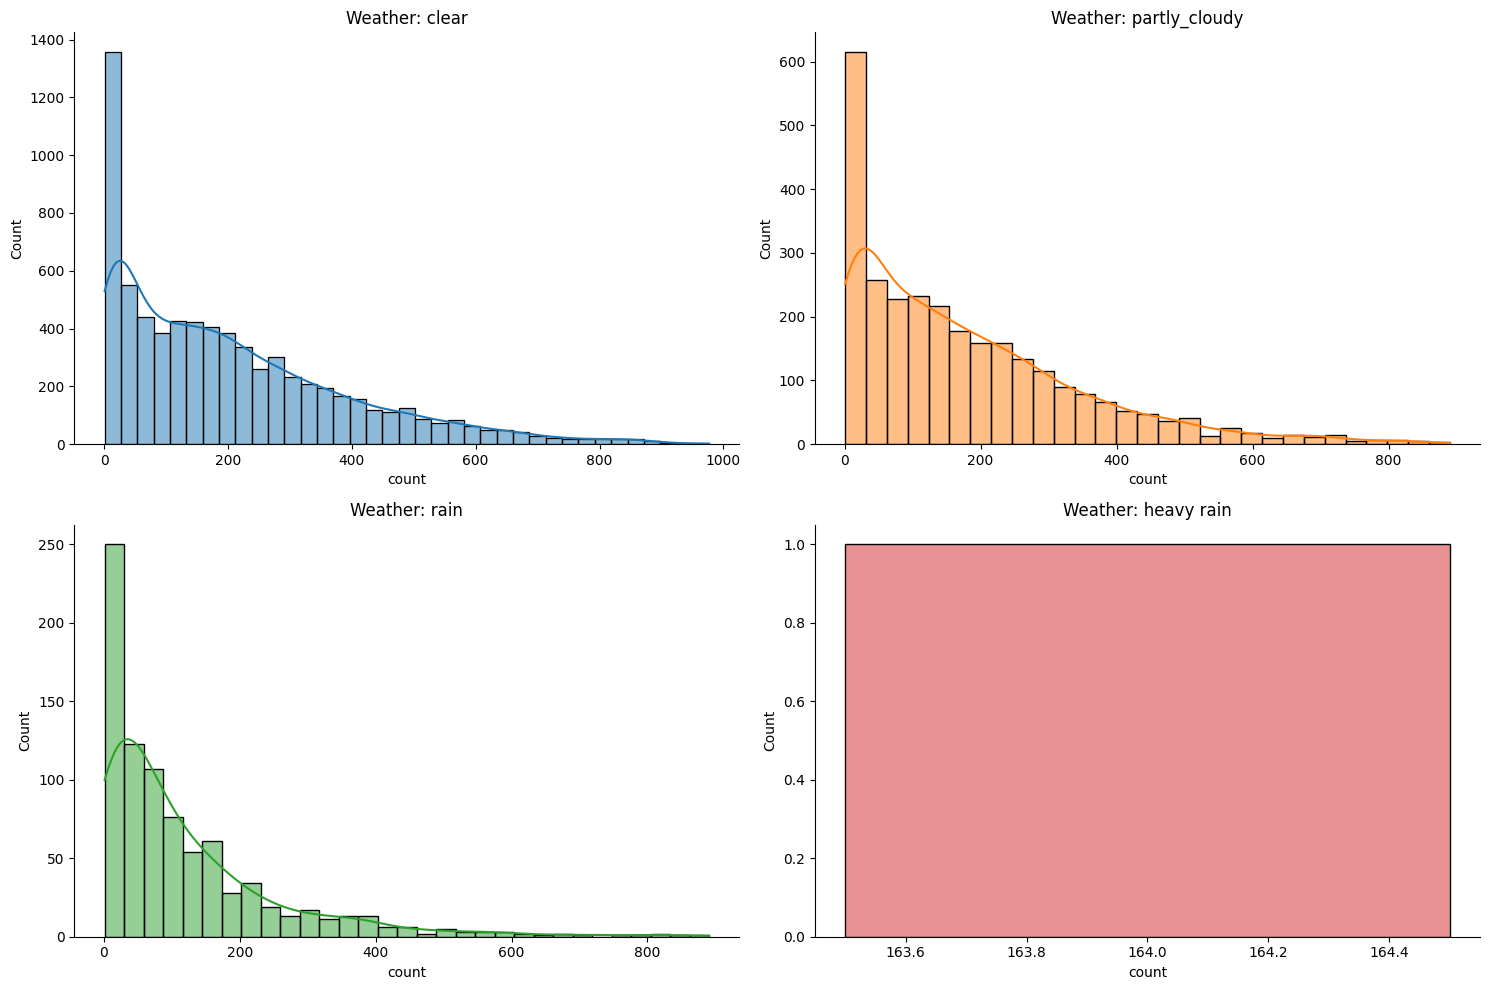

In [ ]:
n= len(df['weather'].value_counts())
col = 2 if n>2 else 1
row = math.ceil(n/col)

fig,axes = plt.subplots(row,col, figsize=(15,5*row))
axes = axes.flatten() if n > 1 else [axes]

for i,weather in enumerate(weathers):
  subset = df[df['weather']== weather]
  sns.histplot(data= subset,x='count',kde=True,ax= axes[i],color=weather_colors.get(weather,'grey'),legend= False)
  axes[i].set_title(f'Weather: {weather}')

# Turn off any unused subplots (if total plots < rows*cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

sns.despine()
plt.tight_layout()
plt.show()


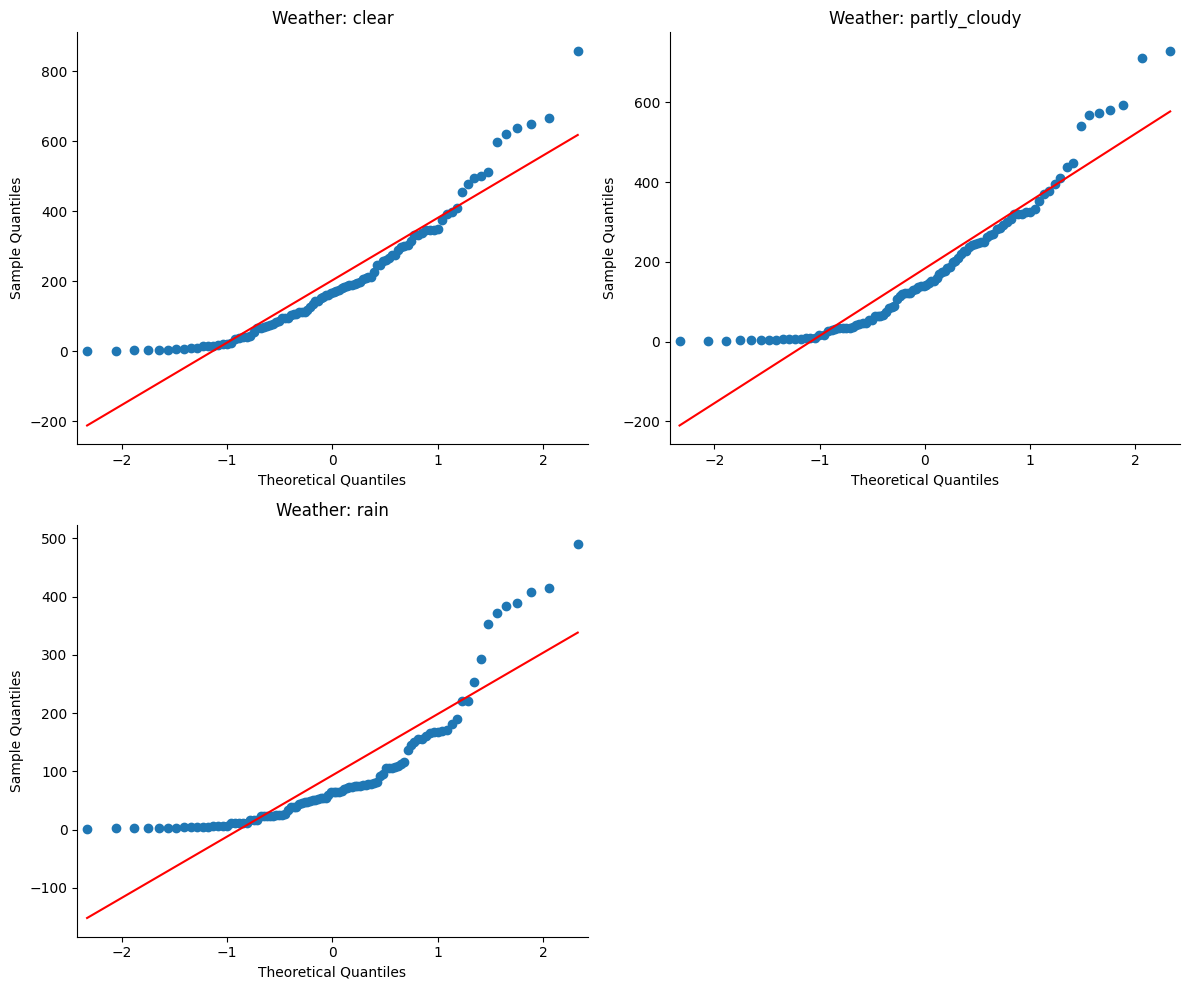

In [ ]:
weathers=list(df['weather'].value_counts().reset_index()['weather'][0:3])
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, weather in enumerate(weathers):
    sample = df[df['weather'] == weather]['count'].sample(n=100, random_state=42)
    qqplot(sample, line='s', ax=axes[i])
    axes[i].set_title(f"Weather: {weather}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

sns.despine()
plt.tight_layout()
plt.show()

Statistical Test to check normality

Shapiro-Wailks Test

We will test the null hypothesis

>$H_0$: data is normally distributed

>$H_a$: data is not normally distributed<br>
>$alpha$: 0.05

In [ ]:
sample = df[df['weather'] == weather]['log_count']
stat, p = shapiro(sample)
print(f"Shapiro-Wilk Test: W={stat:.3f}, p={p:.3f}")

Shapiro-Wilk Test: W=0.961, p=0.000


p_value less than alpha hence we can say that data is not normally distributed.

Statistical Test to check Variance

We will test the null hypothesis

>$H_0$: All the weather count variances are equal



>$H_a$: At least one variance is different from the rest

In [ ]:
clear = df[df['weather'] == 'clear']['log_count']
partly_cloudy = df[df['weather'] == 'partly_cloudy']['log_count']
rain = df[df['weather'] == 'rain']['log_count']
heavy_rain= df[df['weather'] == 'heavy rain']['log_count']

In [ ]:
stat, p_value = levene(clear,partly_cloudy,rain,heavy_rain)
print(p_value)

0.5427571379087562


P-value is greater than alpha hence we can say that all weather conditions have eqaul variance. We can do One-Way Annova to find if weather and count are

**Annova Test:**

$Null Hypothesis (Ho)$: Number of cycles rented is similar in different weather.

$Alternate Hypothesis (Ha)$: Number of cycles rented is different in different weather.



In [ ]:
f_stat_weather, p_value_weather = f_oneway(clear,partly_cloudy,rain,heavy_rain)
print(p_value)

0.5427571379087562


**Kruskal Test:**


$Null Hypothesis (Ho)$: Number of cycles rented is similar in different weather.

$Alternate Hypothesis (Ha)$: Number of cycles rented is different in different weather.


In [ ]:
statistic,p_value = kruskal(clear,partly_cloudy,rain,heavy_rain)
print(f"For Kruskal-Wallis H test the p-value is: {p_value}")

For Kruskal-Wallis H test the p-value is: 3.501611300708679e-44


Since p-value is less than alpha we conclude that number of bikes rented is different in different weather conditions.

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'hour', 'day', 'log_count'],
      dtype='object')

**Q.  Are rides significantly higher on holidays?**

In [ ]:
holidays= list(df.holiday.value_counts().reset_index()['holiday'])
holidays

['no', 'yes']

Normality Check:

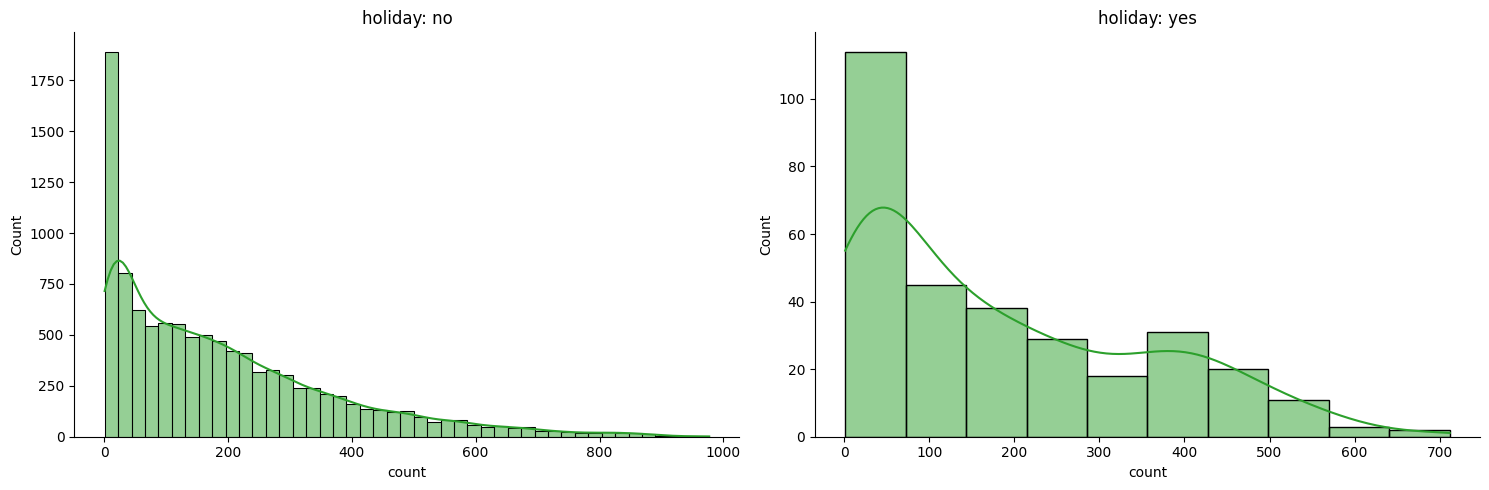

In [ ]:
n= len(df['holiday'].value_counts())
col = 2 if n>=2 else 1
row = math.ceil(n/col)

fig,axes = plt.subplots(row,col, figsize=(15,5*row))
axes = axes.flatten() if n > 1 else [axes]

for i,holiday in enumerate(holidays):
  subset = df[df['holiday']== holiday]
  sns.histplot(data= subset,x='count',kde= True,ax= axes[i],color=weather_colors.get(weather,'grey'),legend= False)
  axes[i].set_title(f'holiday: {holiday}')

# Turn off any unused subplots (if total plots < rows*cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

sns.despine()
plt.tight_layout()
plt.show()


Shapiro-Wilk test for normality

In [ ]:
sample = df[df['holiday'] == holiday]['log_count']
stat, p = shapiro(sample)
print(f"Shapiro-Wilk Test: W={stat}, p={p}")

Shapiro-Wilk Test: W=0.9275226610475508, p=3.732934058203031e-11


Levene Test for equal variance between groups

In [ ]:
holiday_no = df[df['holiday']== 'no']['log_count']
holiday_yes = df[df['holiday']== 'yes']['log_count']

In [ ]:
stat, p = levene(holiday_no,holiday_yes)
print(f"p-value {p}")


p-value 0.8174228802644747


**Independent Two-Group T-Test :**

>$Null-Hypothesis$: The mean ride count on holidays is less than or equal to that on non-holidays.

>$Alternate Hypothesis$: The mean ride count on holidays is greater than that on non-holidays.

In [ ]:
from scipy.stats import ttest_ind

# Student's t-test (equal variances)
t_stats,p_value = ttest_ind(holiday_no,holiday_yes, equal_var=True)

# Welch's t-test (unequal variances)
ttest_ind(holiday_no,holiday_yes, equal_var=False)
print(f"t-stats {t_stats} p_value {p_value}")

t-stats 0.12842166429273424 p_value 0.897817660206847


P-value greater than alpha therefore we fail to reject the null hypothesis.

Observation: The count of bikes taken on holidays are significantly less than as compared to Non-Holiday days

**Q. Do registered users behave differently from casual users in terms of hourly usage?**

In [ ]:
hourly_usage=df.groupby('hour')[['registered','casual']].mean().reset_index()

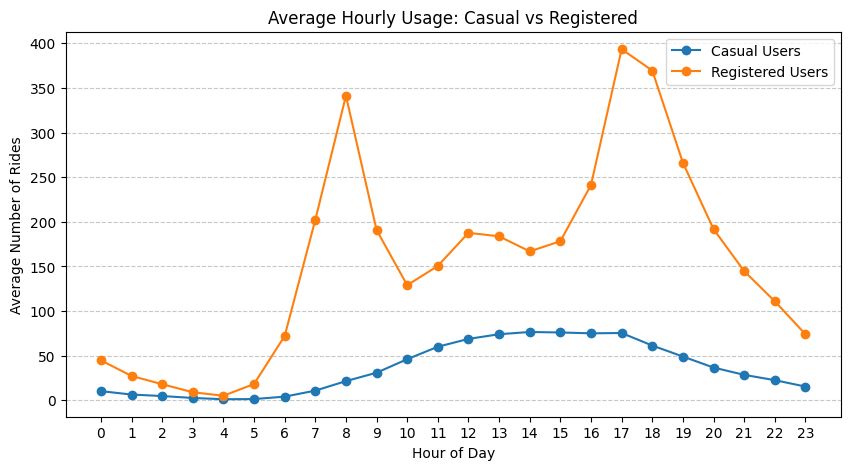

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(hourly_usage['hour'], hourly_usage['casual'], label='Casual Users', marker='o')
plt.plot(hourly_usage['hour'], hourly_usage['registered'], label='Registered Users', marker='o')
plt.title('Average Hourly Usage: Casual vs Registered')
plt.xticks(np.arange(0,24,1))
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rides')

plt.legend()
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()


>$Null-Hypothesis$: No difference in hourly usage patterns between registered and casual users.

>$Alternate Hypothesis$:There is a difference between hourly usage pattern of registered and casual users.


In [ ]:
from scipy.stats import ttest_rel

stat, p_value = ttest_rel(hourly_usage['registered'], hourly_usage['casual'])
print(f"p-value: {p_value}")


p-value: 3.2283850707620033e-06


Observation:<br>
P-value less than alpha therefore we can statistically conclude that there is a difference in the usage pattern of registered and casual users.

**Q.Are average ride counts higher during working days?**

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'hour', 'day', 'log_count'],
      dtype='object')

In [ ]:
working_days = list(df['workingday'].value_counts().reset_index()['workingday'])
working_days

['yes', 'no']

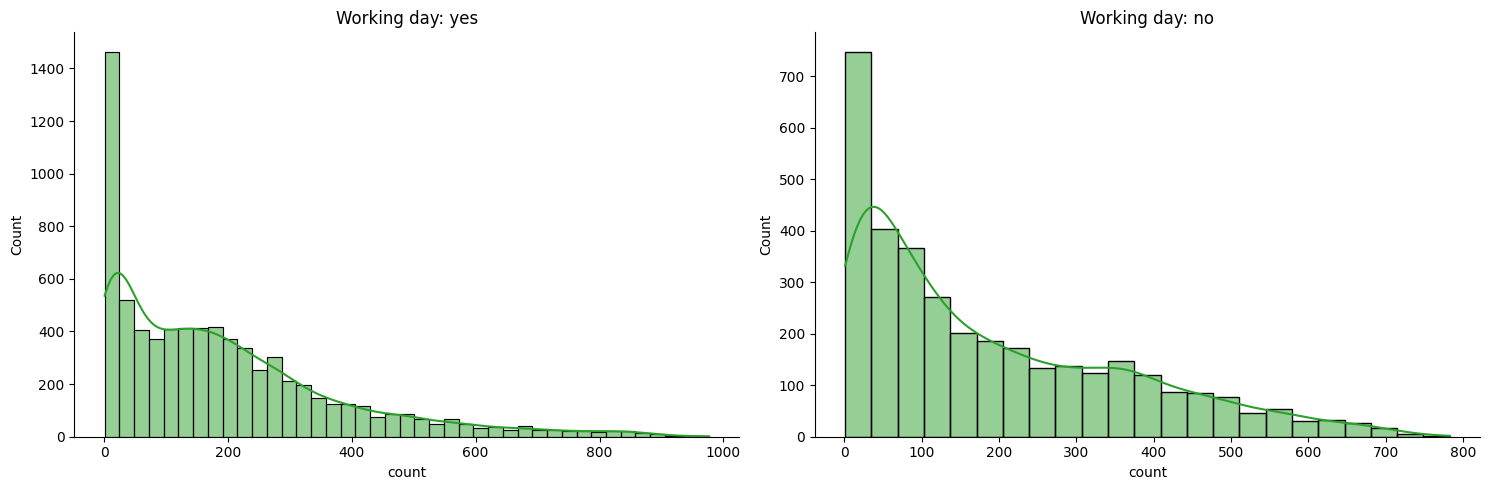

In [ ]:
n= len(df['workingday'].value_counts())
col = 2 if n>=2 else 1
row = math.ceil(n/col)

fig,axes = plt.subplots(row,col, figsize=(15,5*row))
axes = axes.flatten() if n > 1 else [axes]

for i,workingday in enumerate(working_days):
  subset = df[df['workingday']== workingday]
  sns.histplot(data= subset,x='count',kde= True,ax= axes[i],color=weather_colors.get(weather,'grey'),legend= False)
  axes[i].set_title(f'Working day: {workingday}')

# Turn off any unused subplots (if total plots < rows*cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
working_yes= df[df['workingday'] == 'yes']['log_count']
working_no= df[df['workingday'] == 'no']['log_count']

**Normality Check:**

Shapiro-Wlick test

In [ ]:
sample = df[df['workingday'] == workingday]['log_count']
stat, p = shapiro(sample)
print(f"Shapiro-Wilk Test: W={stat}, p={p}")

Shapiro-Wilk Test: W=0.9404695831908609, p=2.875610342640871e-35


**Variance Test:**

Levenes Test:

In [ ]:
stat, p_value = levene(working_yes,working_no)
print(p_value)

0.010646549003327203


>$Null-Hypothesis$: The mean ride count on non working day is less than or equal to that on working day.

>$Alternate Hypothesis$: The mean ride count on working day is greater than that on non-working days.

In [ ]:
t_stats,p_value = ttest_ind(working_yes,working_no,equal_var=True)
print(f'P-value: {p_value}')


P-value: 0.10981847102316886


P-value is greater than alpha so we reject the null hypothesis.

Observation: We can statisticaly say that the number of bikes being rented on working days is greater than those on non-working days.

**Q. Does weather conditions significantly affect ride count?**

In [ ]:
temp_ride_count= df[['temp','atemp','humidity','windspeed','log_count']].corr()
temp_ride_count

,temp,atemp,humidity,windspeed,log_count
temp,1.000000,0.984948,-0.064949,-0.017852,0.376587
atemp,0.984948,1.000000,-0.043536,-0.057473,0.372167
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.333158
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.122754
log_count,0.376587,0.372167,-0.333158,0.122754,1.000000


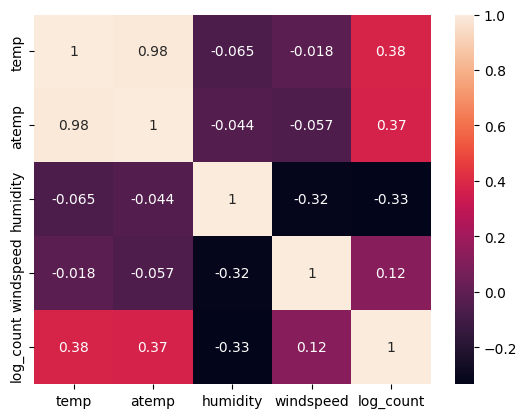

In [ ]:
sns.heatmap(data=temp_ride_count,annot=True)
plt.show()

Observation: <br>


* > Most of the weather conditions like temp,atemp and windspeed has a positive correlation with the count of bike being rented.<br>
* > Humidity is the only weather conditon where there is negative correlation with number of bikes being rented.<br>
* > More humidity causes riders to avoid taking bikes and take other medium of transportation.








**Insights:**

> Demand is highly seasonal: In summer and fall season more bikes are rented as compared to other seasons, indicating a need for different strategies in different months.

> Weather strongly impacts rentals: Rainy and extreme weather conditions lower demand.

> Working days do not significantly impact rentals: Unlike conventional assumptions, there is no major difference in cycle rentals on working vs non-working days.

> Holidays create demand: It is clear that holidays see a surge in rental count.

> Outliers exist in rental count distributions: High and low counts could be attributed to exceptional weather or seasonal events.


**Business Recommendations:**


> Develop a dynamic pricing strategy: Charge higher during peak seasons
  and offer discounts during low seasons.

> Introduce Weather-based alerts & planning: Use weather forecasts to
  adjust fleet availibility dynamically.

> Promote rentals during low-demand seasons: Offer incentives and promotions to maintain demand in off-peak seasons.

> Use predective models for fleet management: Implement machine learning models to optimize fleet distribution based on weather and season.

> Analyze extreme outliers: Unusual rental counts should be investigated to understand potential data inconsistencies or special events affecting demand.

>  Expand Beyond Commuters: Since working days do not significantly impact rentals, target tourists and recreational users. Partner with parks, malls and tourist spots to increase accessibility.

> Improve customer communication: Provide real-time weather alerts in the app to notify users of rental-friendly conditions, also offer personalized discounts based on past riding behaviour.




